### קריאת הקובץ

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def merge_csv_files(file_paths):
    
    dataframes = []

    
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        dataframes.append(df)


    merged_df = pd.concat(dataframes, ignore_index=True)
    
    return merged_df


file_paths = [
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_1.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_2.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_3.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_4.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_5.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_6.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_7.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_8.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_9.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_10.csv'
]

df = merge_csv_files(file_paths)


### יצרית עמודות רלוונטיות

In [13]:
## סידור של עמודת המוצא האתני כדי להבין לאיזה מוצא כל אות מייתחסת
descent_mapping = {
    'A': 'Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}
df['victim_descent'] = df['victim_descent'].map(descent_mapping)

## יצרית עמודה להבנה האם הפשע קרה בשעות הבוקר,צהריים,אחר הצהרים,ערב,לילה 





In [14]:
## יצרית עמודה האם הקורבן הוא ילד,נער מתבגר,מבוגר,זקן
def age_category(age):
        age = int(age)
        if age > 0 and age < 10:
            return "child"
        elif age >= 10 and age < 18:
            return "teenager"
        elif age >= 18 and age < 60:
            return "adult"
        elif age >= 60:
            return "old"
        else:    
            return "unknown"


df["age_description"] = df["victim_age"].apply(age_category)


In [15]:
df['date_occurred'] = pd.to_datetime(df['date_occurred'])


def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'
df['period_occurred'] = df['date_occurred'].dt.month.apply(get_season)

In [16]:
df['hour_occurred'] = pd.to_datetime(df['date_occurred']).dt.hour


In [17]:
df['day_of_week'] = df['date_occurred'].dt.day_name()


In [18]:
df['year_occurred'] = df['date_occurred'].dt.year

In [19]:
def categorize_time(datetime):
    hour = datetime.hour
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Noon'
    elif 16 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'
df['day_time'] = df['date_occurred'].apply(categorize_time)

In [20]:
def classify_weapon(weapon_description):
    firearm_keywords = ['PISTOL', 'REVOLVER', 'RIFLE', 'SHOTGUN', 'FIREARM', 'GUN', 'ASSAULT WEAPON', 'MAC', 'UZI', 'HECKLER & KOCH', 'EXPLOXIVE DEVICE', 'AUTOMATIC WEAPON', 'SEMI-AUTOMATIC', 'STARTER PISTOL', 'M1-1', 'M-14', 'BOMB', 'BOMB THREAT']
    sharp_keywords = ['KNIFE', 'SWORD', 'BLADE', 'SCISSORS', 'AXE', 'SCREWDRIVER', 'DIRK', 'DAGGER', 'CLEAVER', 'RAZOR', 'ICE PICK', 'BOWIE KNIFE', 'STRAIGHT RAZOR', 'OTHER CUTTING INSTRUMENT', 'UNKNOWN TYPE CUTTING INSTRUMENT']
    vehicle_keywords = ['VEHICLE']
    fire_bomb_keywords = ['FIRE', 'EXPLOXIVE DEVICE']
    threat_keywords = ['VERBAL THREAT', 'DEMAND NOTE', 'BOMB THREAT']
    improvised_keywords = ['ROCK', 'THROWN OBJECT', 'BLUNT INSTRUMENT', 'BOTTLE', 'CLUB', 'BAT', 'PIPE', 'STICK', 'HAMMER', 'GLASS', 'BRICK', 'BOARD', 'BELT', 'CHAIN', 'MARTIAL ARTS', 'CONCRETE BLOCK', 'SIMULATED GUN', 'MACE', 'PEPPER SPRAY', 'TOY GUN', 'SYRINGE', 'LIQUOR', 'DRUGS', 'FIXED OBJECT', 'BLACKJACK', 'RELIC FIREARM', 'AIR PISTOL', 'CAUSTIC CHEMICAL', 'POISON', 'BRASS KNUCKLES', 'TIRE IRON', 'DOG/ANIMAL (SIC ANIMAL ON)', 'SCALDING LIQUID', 'ROPE/LIGATURE', 'BOW AND ARROW']
    physical_keywords = ['STRONG-ARM', 'HANDS', 'FIST', 'FEET', 'BODILY FORCE', 'PHYSICAL PRESENCE']
    
    if pd.isna(weapon_description):
        return "NaN"
    
    if 'UNKNOWN WEAPON' in weapon_description or 'OTHER WEAPON' in weapon_description:
        return 'Unknown Weapon'
    if any(keyword in weapon_description for keyword in firearm_keywords):
        return 'firearm'
    elif any(keyword in weapon_description for keyword in sharp_keywords):
        return 'sharp weapon'
    elif any(keyword in weapon_description for keyword in vehicle_keywords):
        return 'vehicles'
    elif any(keyword in weapon_description for keyword in fire_bomb_keywords):
        return 'fire and bombs'
    elif any(keyword in weapon_description for keyword in threat_keywords):
        return 'threats'
    elif any(keyword in weapon_description for keyword in improvised_keywords):
        return 'improvised weapon'
    elif any(keyword in weapon_description for keyword in physical_keywords):
        return 'Physical strength'
    else:
        return 'OTHER'


df['weapon_category'] = df['weapon_description'].apply(classify_weapon)


In [103]:
df.columns

Index(['division_number', 'date_reported', 'date_occurred', 'area',
       'area_name', 'reporting_district', 'part', 'crime_code',
       'crime_description', 'modus_operandi', 'victim_age', 'victim_sex',
       'victim_descent', 'premise_code', 'premise_description', 'weapon_code',
       'weapon_description', 'status', 'status_description', 'crime_code_1',
       'crime_code_2', 'crime_code_3', 'crime_code_4', 'location',
       'cross_street', 'latitude', 'longitude', 'day_time', 'age_description',
       'period_occurred', 'day_diff', 'day_of_week', 'weapon_category'],
      dtype='object')

### בדיקת תקינות הנתונים

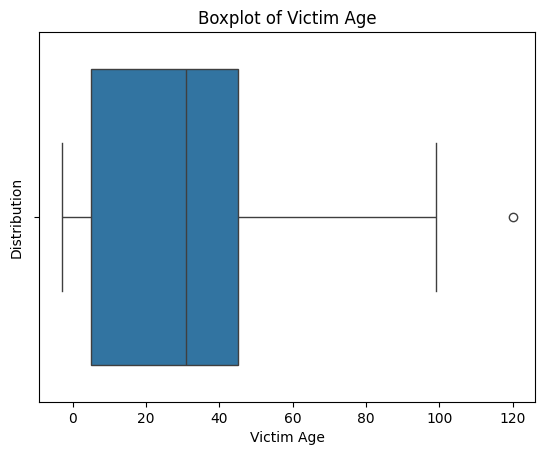

In [9]:
## משהו שמאוד קורץ לעין זהשיש המון חסרים מעמודות של מין הקורבן ומוצאו אבל לא חסר כלום בעמודת הגיל

sns.boxplot(x='victim_age', data=df)
plt.title('Boxplot of Victim Age')
plt.xlabel('Victim Age')
plt.ylabel('Distribution')
plt.show() 

In [10]:
filtered_df = df[(df['victim_age'] == 0) & (df['victim_sex'].isna()) & (df['victim_descent'].isna())]


crime_counts = filtered_df['crime_description'].value_counts()

new_data = pd.DataFrame({'crime_description': crime_counts.index, 'frequency': crime_counts.values})
new_data.head(20)

,crime_description,frequency
0,VEHICLE - STOLEN,90980
1,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),17873
2,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",1763
3,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",1020
4,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",330
5,BOAT - STOLEN,120
6,BURGLARY,74
7,BURGLARY FROM VEHICLE,48
8,THEFT PLAIN - PETTY ($950 & UNDER),41
9,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",40


In [11]:
filtered_data = df[(df['crime_description'] == 'VEHICLE - STOLEN') & (df['victim_age'] == 0)]
crime_description_counts = filtered_df['crime_description'].value_counts()

crime_description_counts


crime_description
VEHICLE - STOLEN                                            90980
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             17873
EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)                   1763
VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)     1020
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD      330
BOAT - STOLEN                                                 120
BURGLARY                                                       74
BURGLARY FROM VEHICLE                                          48
THEFT PLAIN - PETTY ($950 & UNDER)                             41
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)        40
THEFT OF IDENTITY                                              37
ROBBERY                                                        33
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                       28
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)            23
TRESPASSING                                               

In [12]:
filtered_data = df.loc[(df['crime_description'] == 'VEHICLE - STOLEN') & (df['victim_age'] == 0), ['crime_description', 'victim_age']]
filtered_data

,crime_description,victim_age
33,VEHICLE - STOLEN,0
78,VEHICLE - STOLEN,0
104,VEHICLE - STOLEN,0
105,VEHICLE - STOLEN,0
135,VEHICLE - STOLEN,0
...,...,...
852889,VEHICLE - STOLEN,0
852900,VEHICLE - STOLEN,0
852916,VEHICLE - STOLEN,0
852926,VEHICLE - STOLEN,0


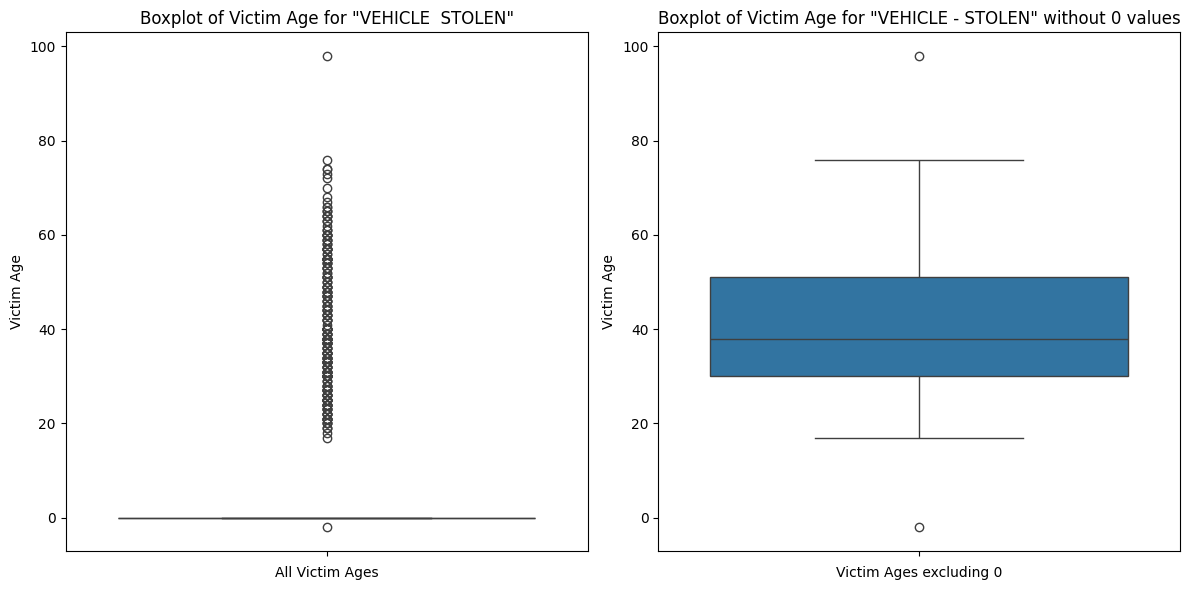

In [48]:
filtered_data_all = df[df['crime_description'] == 'VEHICLE - STOLEN']
filtered_data_no_0 = df[(df['crime_description'] == 'VEHICLE - STOLEN') & (df['victim_age'] != 0)]

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.boxplot(y='victim_age', data=filtered_data_all)
plt.title('Boxplot of Victim Age for "VEHICLE  STOLEN"')
plt.ylabel('Victim Age')
plt.xlabel('All Victim Ages')


plt.subplot(1, 2, 2)
sns.boxplot(y='victim_age', data=filtered_data_no_0)
plt.title('Boxplot of Victim Age for "VEHICLE - STOLEN" without 0 values')
plt.ylabel('Victim Age')
plt.xlabel('Victim Ages excluding 0')

plt.tight_layout()
plt.show()

In [104]:
earliest_date = df['date_occurred'].min()
latest_date = df['date_occurred'].max()

print(f"The earliest date is: {earliest_date}")
print(f"The latest date is: {latest_date}")

The earliest date is: 2020-01-01 00:01:00
The latest date is: 2023-12-04 23:00:00


In [30]:
#### אף על פי זה שאנו מבינים רוב המקרים שבהם הוזן הערך 0 אינם באמת תיקנות אלה ערכים חסרים לא נמהר
### להסיר אותם מהדאטה מכיוון שיש מצב שזה פשוט קורבנותש מעדיפים להישאר בעילום שם

### אלימות פיזית ילדים ונערים

In [33]:
relevant_crimes = [
    'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
    'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',"BATTERY - SIMPLE ASSAULT","ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAUL",
    "OTHER ASSAULT"
    
    
]

Under_age_18_df = df[(df["age_description"] == "child") | (df["age_description"] == "teenager")]
Under_age_18_df = Under_age_18_df[Under_age_18_df['crime_description'].isin(relevant_crimes)]









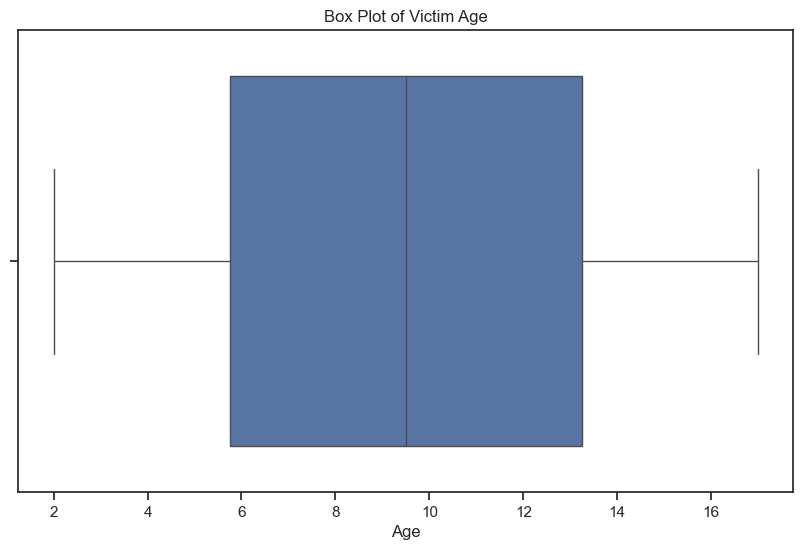

In [34]:
age_counts = Under_age_18_df['victim_age'].value_counts().reset_index()
age_counts.columns = ['victim_age', 'count']

plt.figure(figsize=(10,6))
sns.boxplot(x=age_counts["victim_age"])
plt.title('Box Plot of Victim Age')
plt.xlabel('Age')
plt.show()

In [35]:
child_df = Under_age_18_df[Under_age_18_df["age_description"] == "child"]
child_df_place_count = child_df['premise_description'].value_counts().reset_index()
child_df_place_count.columns = ["place_description", "amount"]



teenager_df = Under_age_18_df[Under_age_18_df["age_description"] == "teenager"]
teenager_df_place_count = teenager_df['premise_description'].value_counts().reset_index()
teenager_df_place_count.columns = ["place_description", "amount"]




C:\Users\Win10\AppData\Local\Temp\ipykernel_7424\3583144332.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_child_places, x='place_description', y='amount', palette=[color_mapping[place] for place in top_child_places['place_description']])
C:\Users\Win10\AppData\Local\Temp\ipykernel_7424\3583144332.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_teenager_places, x='place_description', y='amount', palette=[color_mapping[place] for place in top_teenager_places['place_description']])


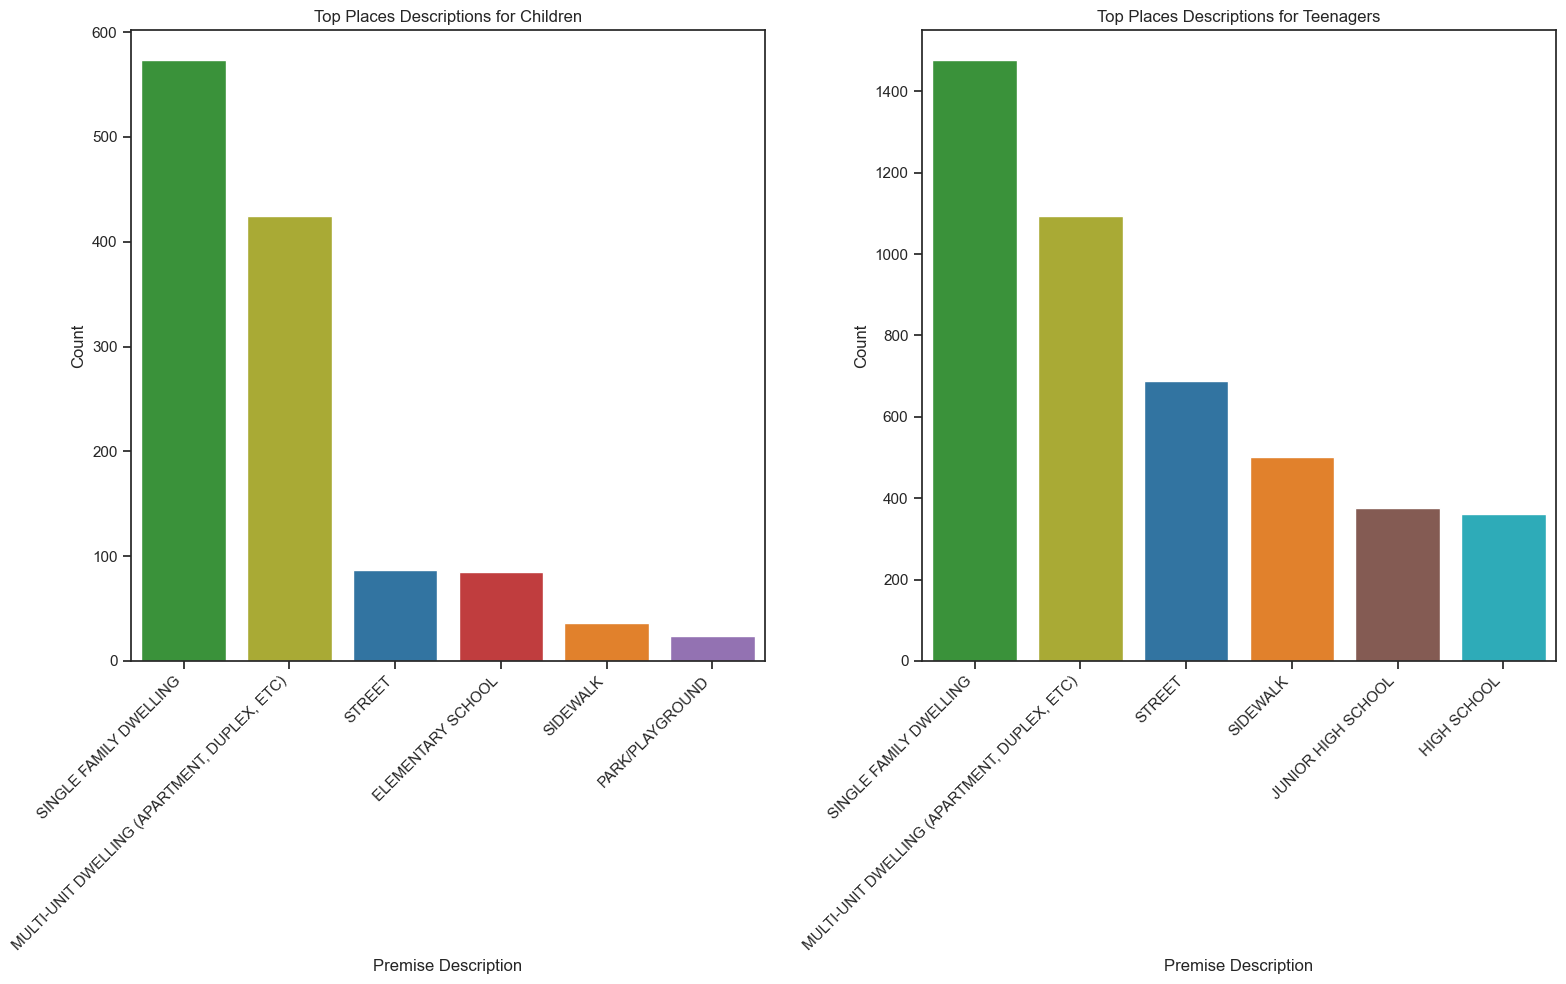

In [36]:
top_child_places = child_df_place_count.head(6)
top_teenager_places = teenager_df_place_count.head(6)


common_places = set(top_child_places['place_description']).intersection(set(top_teenager_places['place_description']))


custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#17becf', '#bcbd22']  # כחול, כתום, ירוק, אדום, סגול, חום, טורקיז, צהוב ירקרק
unique_places = list(set(top_child_places['place_description']).union(set(top_teenager_places['place_description'])))
color_mapping = {place: custom_palette[i % len(custom_palette)] for i, place in enumerate(unique_places)}


plt.figure(figsize=(16, 10))


plt.subplot(1, 2, 1)
sns.barplot(data=top_child_places, x='place_description', y='amount', palette=[color_mapping[place] for place in top_child_places['place_description']])
plt.xticks(rotation=45, ha="right")
plt.title('Top Places Descriptions for Children')
plt.xlabel('Premise Description')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.barplot(data=top_teenager_places, x='place_description', y='amount', palette=[color_mapping[place] for place in top_teenager_places['place_description']])
plt.xticks(rotation=45, ha="right")
plt.title('Top Places Descriptions for Teenagers')
plt.xlabel('Premise Description')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

ניתן להבחין שכאשר מדובר על פשעי אלימות ופשעי מין,בשתי קבוצות הגילאים שבשתי המקומות הראשונים מופיעים מקומות מגורים

##### ניצור עמודה חדשה שתעזור לנו להבין האם המקרים קרו במתחמי מגורים,בבית ספר, במקומות אחרים

In [37]:
residential_areas = [
    'SINGLE FAMILY DWELLING', 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
    'GROUP HOME', 'OTHER RESIDENCE', 'YARD (RESIDENTIAL/BUSINESS)',
    'CONDOMINIUM/TOWNHOUSE', 'MOBILE HOME/TRAILERS/CONSTRUCTION TRAILERS/RV\'S/MOTORHOME',
    'FOSTER HOME BOYS OR GIRLS*', 'PROJECT/TENEMENT/PUBLIC HOUSING', 'PORCH, RESIDENTIAL',
    'TRANSIENT ENCAMPMENT', 'SINGLE RESIDENCE OCCUPANCY (SRO\'S) LOCATIONS'
]

schools = [
    'HIGH SCHOOL', 'JUNIOR HIGH SCHOOL', 'ELEMENTARY SCHOOL',
    'SPECIALTY SCHOOL/OTHER', 'PRIVATE SCHOOL/PRESCHOOL', 'DAY CARE/CHILDREN*',
    'BUS, SCHOOL, CHURCH', 'COLLEGE/JUNIOR COLLEGE/UNIVERSITY', 'DAY CARE/ADULTS*',
    'TRADE SCHOOL (MEDICAL-TECHNICAL-BUSINESS)*', 'FRAT HOUSE/SORORITY/DORMITORY'
]




def categorize_premise(premise):
    if premise in residential_areas:
        return 'Residential Areas'
    elif premise in schools:
        return 'Schools'
    else:
        return 'Non-Residential and Non-Schools'

Under_age_18_df['where_did_it_happen'] = Under_age_18_df['premise_description'].apply(categorize_premise)
### בנינו פונקציה שבודקת האם המקרה קרה מתחם מגורים למשל סוגרי דירות למינהם 

In [38]:
Under_age_18_df_value_counts = Under_age_18_df['where_did_it_happen'].value_counts().reset_index()
Under_age_18_df_value_counts.columns = ['where_did_it_happen', 'count']
Under_age_18_df_value_counts

,where_did_it_happen,count
0,Residential Areas,3806
1,Non-Residential and Non-Schools,2429
2,Schools,974


C:\Users\Win10\AppData\Local\Temp\ipykernel_7424\1868203719.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')


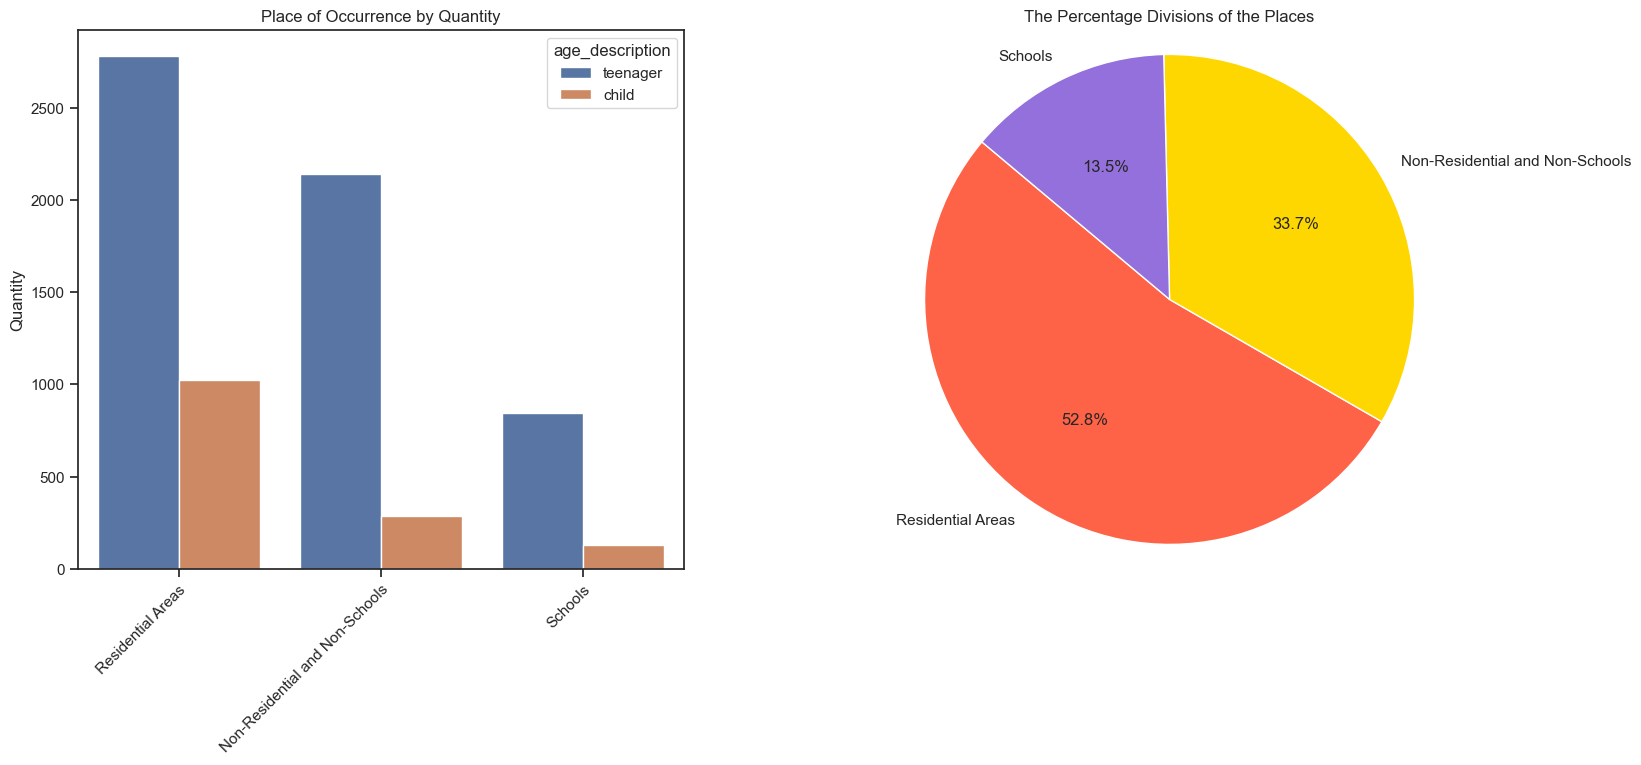

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))


sns.countplot(data=Under_age_18_df[Under_age_18_df['where_did_it_happen'] != 'Unknown'], hue='age_description', x='where_did_it_happen', order=Under_age_18_df_value_counts['where_did_it_happen'], ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
ax[0].set_title('Place of Occurrence by Quantity')
ax[0].set_xlabel('')
ax[0].set_ylabel('Quantity')


pie_data = Under_age_18_df['where_did_it_happen'].value_counts().reset_index()
pie_data.columns = ['where_did_it_happen', 'count']
colors = ['#FF6347', '#FFD700', '#9370DB']  # Matte red, yellow, and purple
ax[1].pie(pie_data['count'], labels=pie_data['where_did_it_happen'], autopct='%1.1f%%', startangle=140, colors=colors)
ax[1].set_title('The Percentage Divisions of the Places')
ax[1].axis('equal')


plt.subplots_adjust(wspace=0.3)
plt.show()

נתונים מדאיגים מצביעים על כך שגם עבור ילדים וגם עבור בני נוער המקומות שבהם הם הכי חשופים לאלימות הם דווקא בבית

In [40]:
all_population_df = df[df['crime_description'].isin(relevant_crimes)]
all_population_df['where_did_it_happen'] = all_population_df['premise_description'].apply(categorize_premise)

all_population_value_counts = all_population_df['where_did_it_happen'].value_counts().reset_index()
all_population_value_counts.columns = ['where_did_it_happen', 'count']
all_population_value_counts

C:\Users\Win10\AppData\Local\Temp\ipykernel_7424\3409849938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_population_df['where_did_it_happen'] = all_population_df['premise_description'].apply(categorize_premise)


,where_did_it_happen,count
0,Non-Residential and Non-Schools,46887
1,Residential Areas,27489
2,Schools,1267


C:\Users\Win10\AppData\Local\Temp\ipykernel_7424\3031056770.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=all_population_value_counts, x='where_did_it_happen', y='count', ax=axs[0, 0], palette=all_population_value_counts['color'].tolist())
C:\Users\Win10\AppData\Local\Temp\ipykernel_7424\3031056770.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
C:\Users\Win10\AppData\Local\Temp\ipykernel_7424\3031056770.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Under_age_18_df_value_count

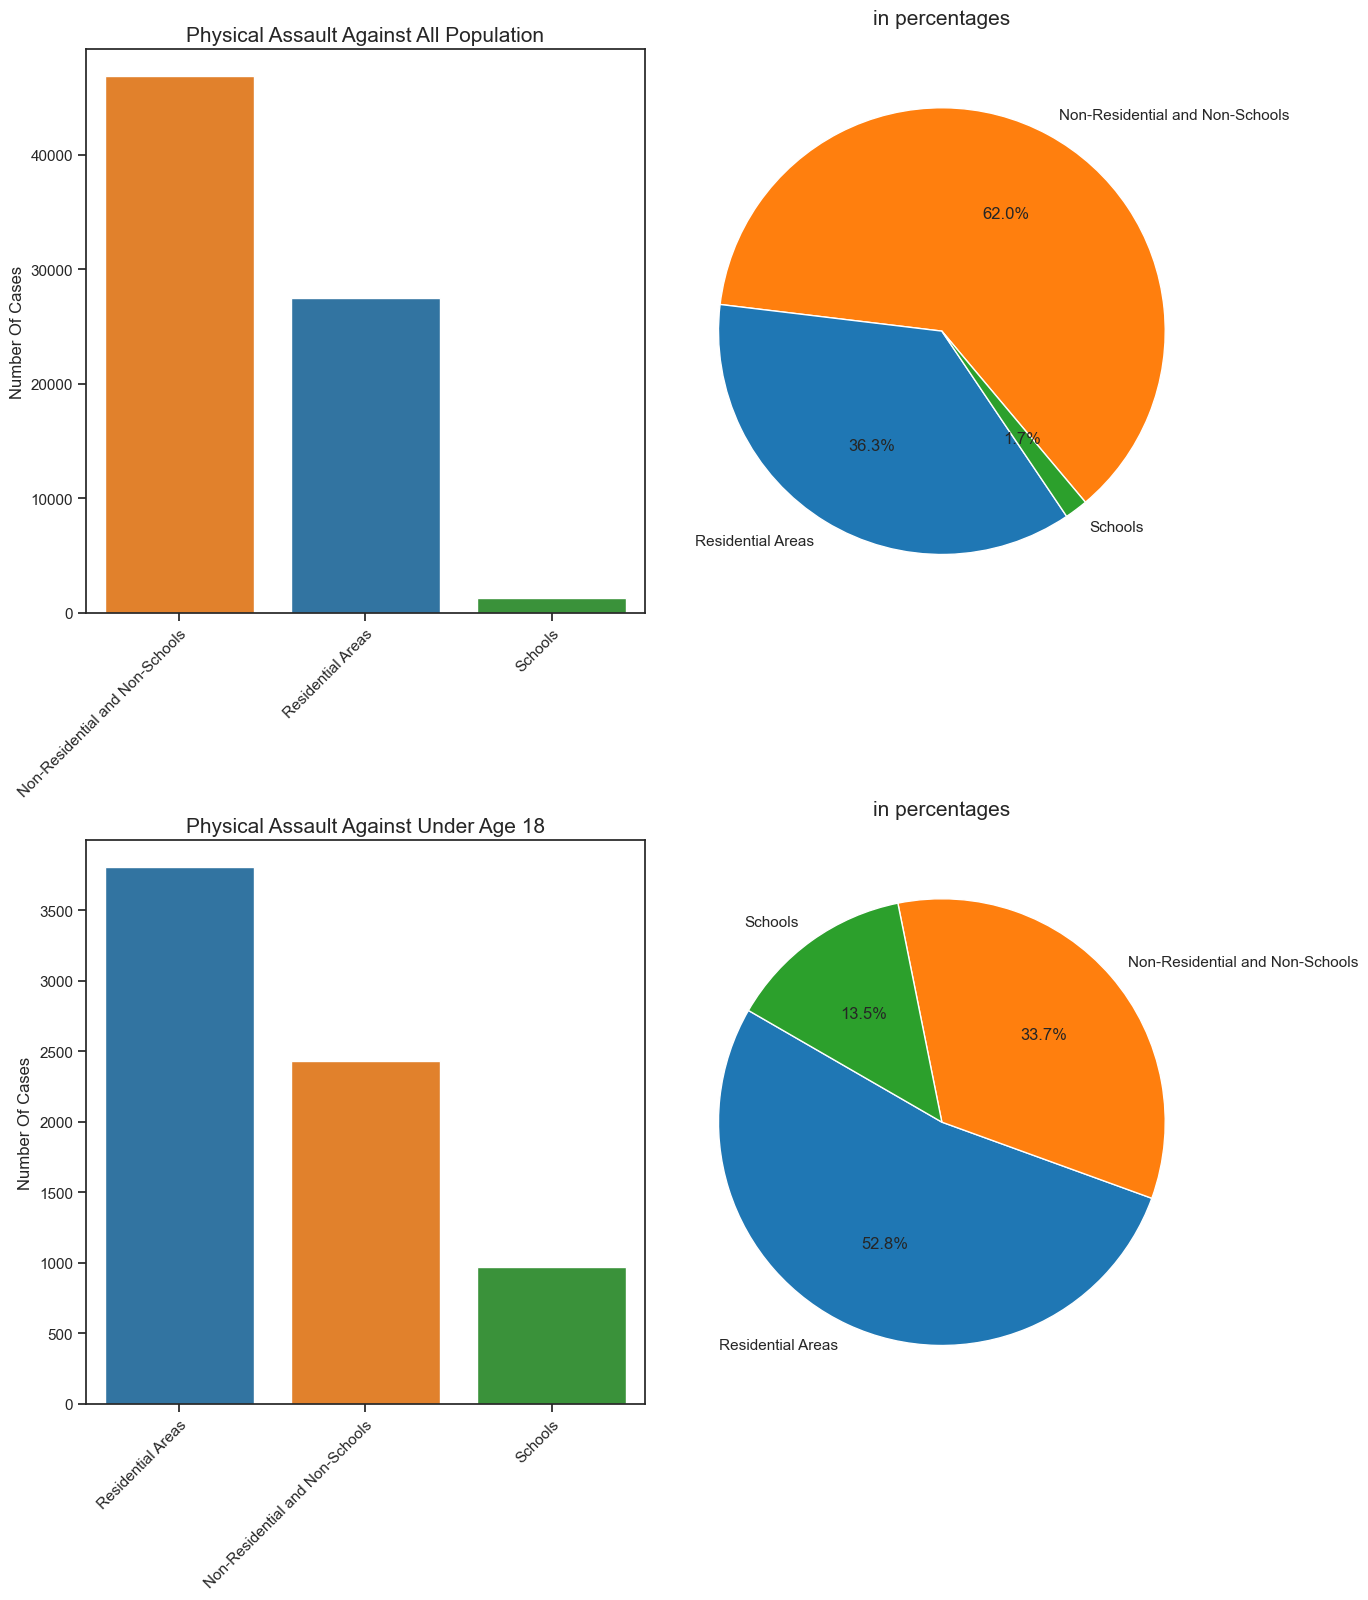

In [41]:
color_palette = {
    'Residential Areas': '#1f77b4',  # Blue
    'Non-Residential and Non-Schools': '#ff7f0e',  # Orange
    'Schools': '#2ca02c',  # Green
    'Unknown': '#d62728'  # Red
}

all_population_value_counts['color'] = all_population_value_counts['where_did_it_happen'].map(color_palette)
Under_age_18_df_value_counts['color'] = Under_age_18_df_value_counts['where_did_it_happen'].map(color_palette)


all_population_colors = [color_palette[label] for label in all_population_value_counts['where_did_it_happen']]
under_age_18_colors = [color_palette[label] for label in Under_age_18_df_value_counts['where_did_it_happen']]

fig, axs = plt.subplots(2, 2, figsize=(14, 16))


sns.barplot(data=all_population_value_counts, x='where_did_it_happen', y='count', ax=axs[0, 0], palette=all_population_value_counts['color'].tolist())
axs[0, 0].set_title('Physical Assault Against All Population', fontsize=15)
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('Number Of Cases')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')


axs[0, 1].pie(all_population_value_counts['count'], 
              labels=all_population_value_counts['where_did_it_happen'], 
              colors=all_population_colors, autopct='%1.1f%%', startangle=310)
axs[0, 1].set_title('in percentages', fontsize=15, pad=20)


sns.barplot(data=Under_age_18_df_value_counts, x='where_did_it_happen', y='count', ax=axs[1, 0], palette=Under_age_18_df_value_counts['color'].tolist())
axs[1, 0].set_title('Physical Assault Against Under Age 18', fontsize=15)
axs[1, 0].set_xlabel('')
axs[1, 0].set_ylabel('Number Of Cases')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')


axs[1, 1].pie(Under_age_18_df_value_counts['count'], 
              labels=Under_age_18_df_value_counts['where_did_it_happen'], 
              colors=under_age_18_colors, autopct='%1.1f%%', startangle=150)
axs[1, 1].set_title('in percentages', fontsize=15, pad=20)

plt.tight_layout()
plt.show()

ניתן לראות על פי הגרפים את ההבדלים כאשר מדובר על אלימות מתחת לגיל 18 רוב המקרם מתרחשים במתחמי מגורים ואילו כאשר מסתכלים על כלל האוכלוסייה רוב המקרים מתרחשים במרומות שהם לא מתחמי מגורים, וזה בא לידי ביטוי גם באחוזים

#### נבדוק את הפער בימי הדיווח

In [42]:
violance_residential_under18_df = Under_age_18_df[Under_age_18_df['where_did_it_happen'] == "Residential Areas"]

### גנבי זהות בהולנבק

In [88]:
identity_theft = df[df["crime_description"] == "THEFT OF IDENTITY"]




#### נעיף מבט על התפלגות הגילאים של הקורבנות

C:\Users\Win10\AppData\Local\Temp\ipykernel_3596\1974408678.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=identity_theft, x='victim_age', palette='pastel')


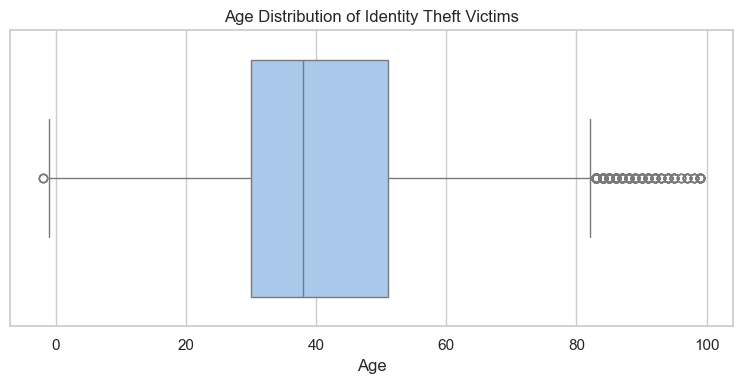

In [89]:
plt.figure(figsize=(15,4))


plt.subplot(1, 2, 1)
sns.boxplot(data=identity_theft, x='victim_age', palette='pastel')
plt.title('Age Distribution of Identity Theft Victims')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

In [90]:
identity_theft_age0 = identity_theft[identity_theft['victim_age'] <= 0]
len(identity_theft_age0)


992

קיימים כ992 ערכים שהגיל שלהם הוא קטן או שווה ל 0 נבחר להשאיר אותם מכיוון שסביר שהמתלוננים בחרו להישאר בעילום שם או טעות בהקלדת הנתונים נבחר להשאירים כדי הם עדיין מקרים שקרו 

#### נבחן את אזורי הפשיעה הבהם נעשים פשעי גניבת הזהות

In [123]:
idt_by_area = identity_theft['area_name'].value_counts().reset_index()
idt_by_area.columns = ["area_name","amount"]



#### נבחן את המקומות הבהם נעשים פשעי גניבת הזהות

In [126]:
place_counts = identity_theft['premise_description'].value_counts().reset_index()
place_counts.columns = ['place', 'count']
place_counts.head()


,place,count
0,SINGLE FAMILY DWELLING,26250
1,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",12915
2,BANK,2452
3,AUTOMATED TELLER MACHINE (ATM),2205
4,CYBERSPACE,1592


#### נבדוק מה הם האיזורים שעושים שימוש במקומות שמתעסקים בכסף כדי לגנוב את זהות הקורבנות
נסווג את המקומות שמתעסקים בכסף, ונגנבים שם זהויות של אנשים

In [124]:
selected_premises = [
    "BANK DROP BOX/MONEY DROP-OUTSIDE OF BANK",
    "DRIVE THRU BANKING (WINDOW)",
    "BANKING INSIDE MARKET-STORE",
    "CHECK CASHING",
    "SAVINGS & LOAN",
    "FINANCE COMPANY",
    "CREDIT UNION",
    "AUTOMATED TELLER MACHINE (ATM)",
    "BANK"
]

idt = identity_theft[identity_theft['premise_description'].isin(selected_premises)]
idt_area_name = idt['area_name'].value_counts().reset_index()
idt_area_name.columns = ['area_name', 'amount']


C:\Users\Win10\AppData\Local\Temp\ipykernel_3596\1537978483.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=idt_area_name, x='amount', y='area_name', ax=axs[0], palette=colors_area_name)
C:\Users\Win10\AppData\Local\Temp\ipykernel_3596\1537978483.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=idt_by_area, x='amount', y='area_name', ax=axs[1], palette=colors_by_area)


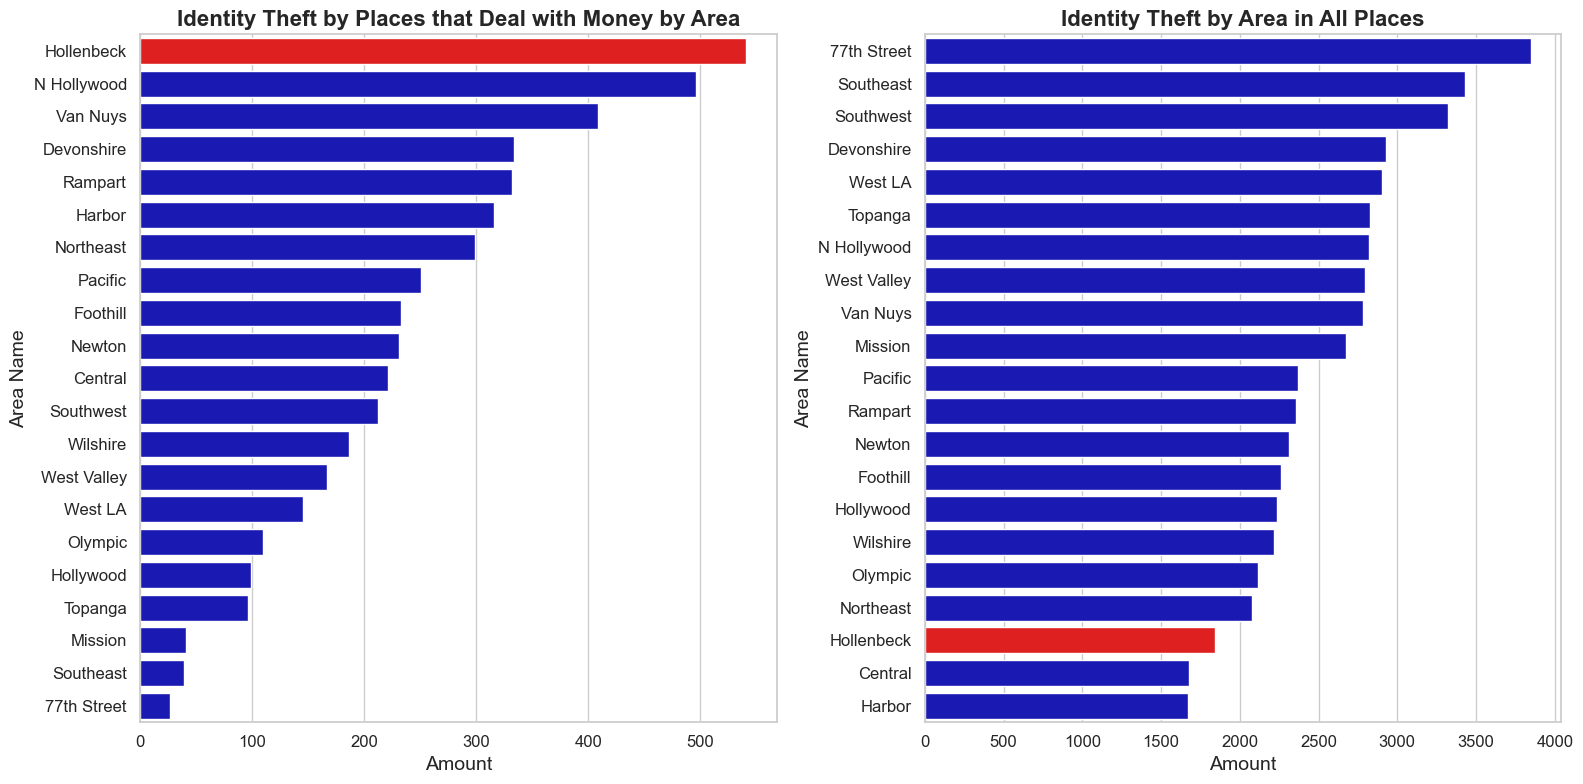

In [102]:
colors_area_name = ['#ff0000' if area == 'Hollenbeck' else '#0000cd' for area in idt_area_name['area_name']]
colors_by_area = ['#ff0000' if area == 'Hollenbeck' else '#0000cd' for area in idt_by_area['area_name']]


fig, axs = plt.subplots(1, 2, figsize=(16, 8))


sns.barplot(data=idt_area_name, x='amount', y='area_name', ax=axs[0], palette=colors_area_name)
axs[0].set_title('Identity Theft by Places that Deal with Money by Area', fontsize=16, weight='bold')
axs[0].set_xlabel('Amount', fontsize=14)
axs[0].set_ylabel('Area Name', fontsize=14)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)


sns.barplot(data=idt_by_area, x='amount', y='area_name', ax=axs[1], palette=colors_by_area)
axs[1].set_title('Identity Theft by Area in All Places', fontsize=16, weight='bold')
axs[1].set_xlabel('Amount', fontsize=14)
axs[1].set_ylabel('Area Name', fontsize=14)
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)


plt.tight_layout()


plt.show()

###### נתון מפתיע הולנבק האזור שנמצא במקומות האחרונים (שלישי לפני הסוף) נמצא במקום הראשון שמדובר על פשעים שנעשו במקומות שמתעסקים בכסף

#### ננסה להבין מי האוכלוסייה שסובלת הכי הרבה מגנבי זהות במקומות שעיקר התעסוקתם זה כסף בהולנבק

In [141]:
idt_Hollenbeck = identity_theft[(identity_theft['premise_description'].isin(selected_premises)) & (identity_theft['area_name'] == 'Hollenbeck')]
idt_Hollenbeck_by_descent = idt_Hollenbeck['victim_descent'].value_counts().reset_index()
idt_Hollenbeck_by_descent.columns = ['victim_descent', 'amount']


C:\Users\Win10\AppData\Local\Temp\ipykernel_3596\4165513969.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='victim_descent', y='amount', data=idt_Hollenbeck_by_descent, palette=custom_palette, ax=ax)
C:\Users\Win10\AppData\Local\Temp\ipykernel_3596\4165513969.py:6: UserWarning: 
The palette list has fewer values (8) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='victim_descent', y='amount', data=idt_Hollenbeck_by_descent, palette=custom_palette, ax=ax)
C:\Users\Win10\AppData\Local\Temp\ipykernel_3596\4165513969.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


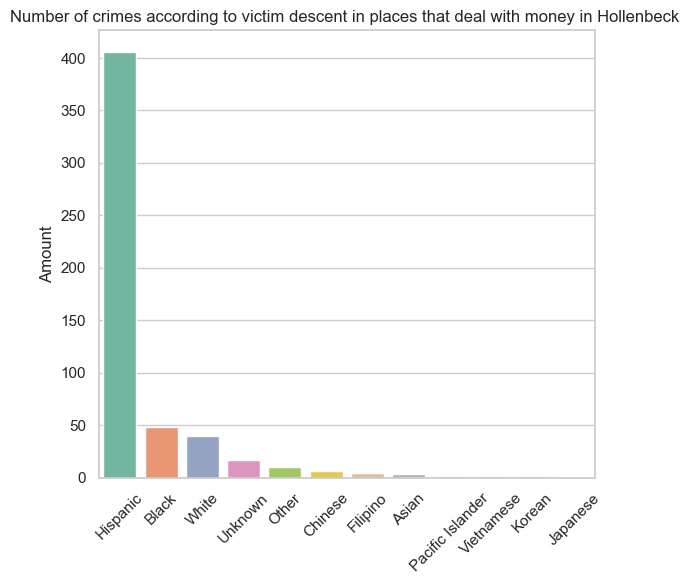

In [142]:
custom_palette = sns.color_palette("Set2")

fig, ax = plt.subplots(figsize=(6, 6))

# Bar plot with the custom color palette
sns.barplot(x='victim_descent', y='amount', data=idt_Hollenbeck_by_descent, palette=custom_palette, ax=ax)

ax.set_title("Number of crimes according to victim descent in places that deal with money in Hollenbeck ")
ax.set_xlabel("")
ax.set_ylabel("Amount")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

הקורלציה החזקה והשלילית מתארת את הקשר שבין המקרים ככול שכמות הפשעים שבוצעו בעזרת נשק חם בשכונת 77 יורדים, אנו נקבל עלייה בכמות הפשעים שבוצעו בנשק חם במקומות פרטיים

##### ניתן לראות שבפער ניקר ההיספנים המסכנים סובלים הכי הרבה מהגניבות זהות במקמות  שעיקר התעסקותם זה כסף

C:\Users\Win10\AppData\Local\Temp\ipykernel_3596\989459577.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='group', y='percentage', data=grouped_data_hollenbeck, palette=['#ff7f0e', '#1f77b4'], ax=axs[0])  # Orange and Blue
C:\Users\Win10\AppData\Local\Temp\ipykernel_3596\989459577.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='group', y='percentage', data=grouped_data_all, palette=['#ff7f0e', '#1f77b4'], ax=axs[1])


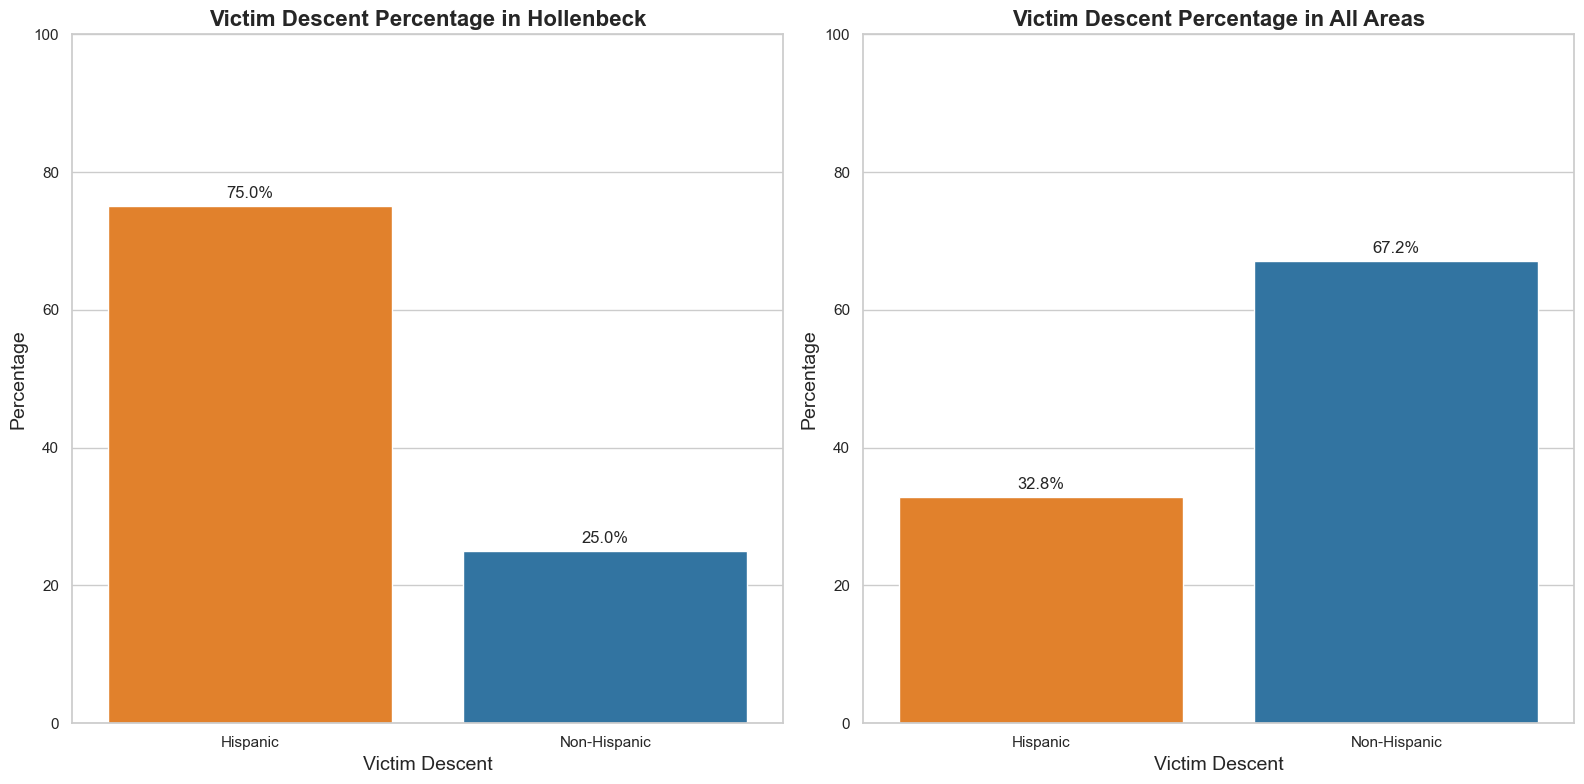

In [121]:
total_amount_hollenbeck = idt_Hollenbeck_by_descent['amount'].sum()
idt_Hollenbeck_by_descent['percentage'] = (idt_Hollenbeck_by_descent['amount'] / total_amount_hollenbeck) * 100


idt_Hollenbeck_by_descent['group'] = idt_Hollenbeck_by_descent['victim_descent'].apply(lambda x: 'Hispanic' if x == 'Hispanic' else 'Non-Hispanic')
grouped_data_hollenbeck = idt_Hollenbeck_by_descent.groupby('group').sum().reset_index()


total_amount = idt_by_descent['amount'].sum()
idt_by_descent['percentage'] = (idt_by_descent['amount'] / total_amount) * 100


idt_by_descent['group'] = idt_by_descent['victim_descent'].apply(lambda x: 'Hispanic' if x == 'Hispanic' else 'Non-Hispanic')
grouped_data_all = idt_by_descent.groupby('group').sum().reset_index()


fig, axs = plt.subplots(1, 2, figsize=(16, 8))


sns.barplot(x='group', y='percentage', data=grouped_data_hollenbeck, palette=['#ff7f0e', '#1f77b4'], ax=axs[0])  # Orange and Blue
for p in axs[0].patches:
    percentage = f'{p.get_height():.1f}%'
    axs[0].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')
axs[0].set_title('Victim Descent Percentage in Hollenbeck', fontsize=16, weight='bold')
axs[0].set_ylabel('Percentage', fontsize=14)
axs[0].set_xlabel('Victim Descent', fontsize=14)
axs[0].set_ylim(0, 100)


sns.barplot(x='group', y='percentage', data=grouped_data_all, palette=['#ff7f0e', '#1f77b4'], ax=axs[1]) 
for p in axs[1].patches:
    percentage = f'{p.get_height():.1f}%'
    axs[1].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')
axs[1].set_title('Victim Descent Percentage in All Areas', fontsize=16, weight='bold')
axs[1].set_ylabel('Percentage', fontsize=14)
axs[1].set_xlabel('Victim Descent', fontsize=14)
axs[1].set_ylim(0, 100)


plt.tight_layout()


plt.show()

#### מסקנה 1

ניתן להבחין כי כאשר מדובר על פשעי גניבות הזהות באופן כללי האיזור הולנבק נמצא בין האיזורים שבהם כמות פשעי גניבות הזהות מהנמוכים ביותר
אך כאשר אנו מסתכלים על פשעי גניבות הזהות שנעשים במקומות ציבוריים שעיקר התעסקותם זה כסף (בנקים,כספומטים,חברות,אשראי וכו), הולנבק במקום הראשון
מבדיקה קצרה בגוגל, גילנו שבהולנבק שיעור העוני מהגבוהים בארצות הברית, כ33 אחוז נמאים מתחת לקו העוני וגם שההיספנים מהווים כ65 אחוז מכלל העניים בארצות הברית.
נתונים אלו יכולים להסביר את המגמת גניבות הזהות שאנו רואים במקומות ציבוריים שעיקר עיסוקיים זה כסף בהולנבק ,ההנחה שלנו היא שההיספנים שנמצאים שם מהווים "טרף קל"
לגנבי זהות עכב העובדה שרובם עניים קל יותר לפתה אותם למסור פרטיים אישים במקומות כמו בנקים כספומטים וגרומים אחרים שמתעסקים בכסף 

### פריצות לנכנסים של האוכלוסייה המבוגרת 

In [73]:
old_df = df[df["age_description"]== "old"]

old_df_crime_description = old_df['crime_description'].value_counts().reset_index()
old_df_crime_description.columns = ['crime_description', 'count']

old_df_crime_description.head(20)


,crime_description,count
0,BATTERY - SIMPLE ASSAULT,9901
1,BURGLARY,8426
2,THEFT OF IDENTITY,7226
3,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",5190
4,THEFT PLAIN - PETTY ($950 & UNDER),5010
5,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,4778
6,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",4681
7,BURGLARY FROM VEHICLE,4323
8,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",3131
9,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2983


C:\Users\Win10\AppData\Local\Temp\ipykernel_7256\2863840817.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='premise_description', y='count', data=top_10_premise_descriptions, palette=colors, edgecolor='black', ax=ax)
C:\Users\Win10\AppData\Local\Temp\ipykernel_7256\2863840817.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
C:\Users\Win10\AppData\Local\Temp\ipykernel_7256\2863840817.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


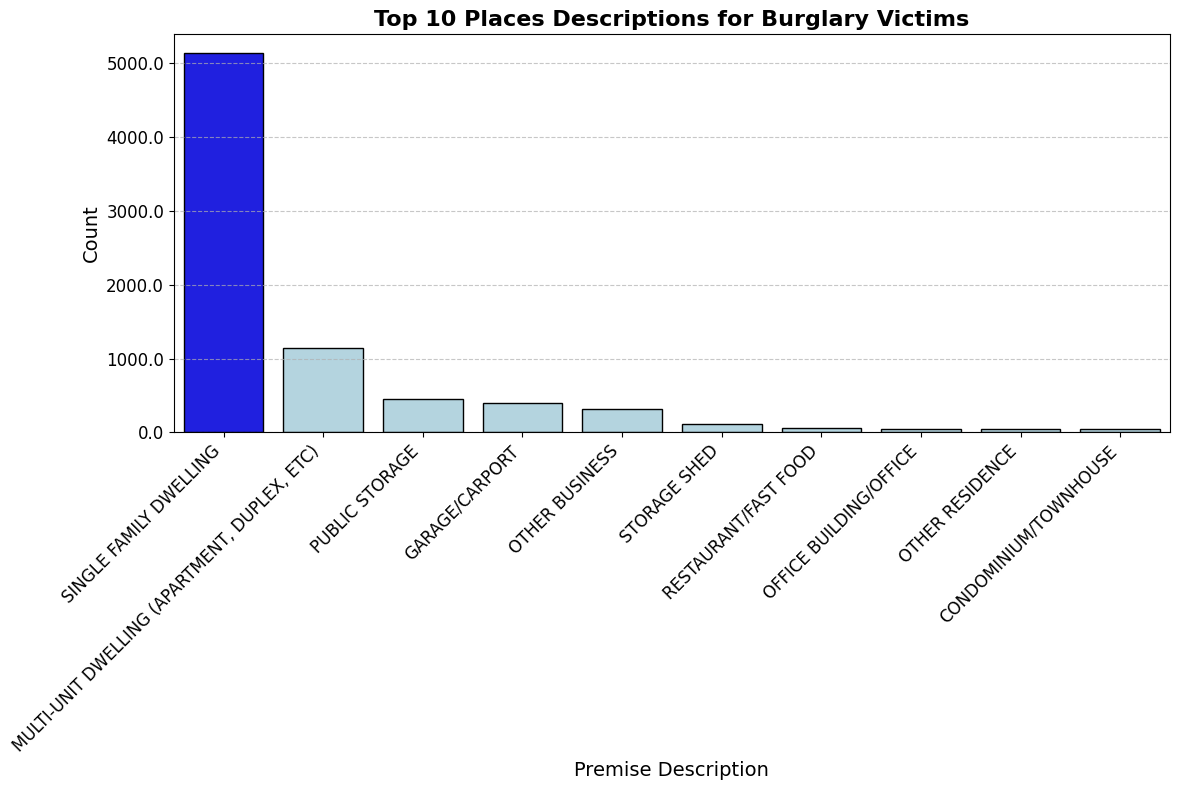

In [74]:
old_burglary_df = old_df[old_df["crime_description"] == "BURGLARY"]
premise_description_counts = old_burglary_df['premise_description'].value_counts().reset_index()
premise_description_counts.columns = ['premise_description', 'count']
top_10_premise_descriptions = premise_description_counts.head(10)


fig, ax = plt.subplots(figsize=(12, 8))


colors = ['lightblue' if count != top_10_premise_descriptions['count'].max() else 'blue' for count in top_10_premise_descriptions['count']]


sns.barplot(x='premise_description', y='count', data=top_10_premise_descriptions, palette=colors, edgecolor='black', ax=ax)


ax.set_xlabel('Premise Description', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Top 10 Places Descriptions for Burglary Victims', fontsize=16, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)


ax.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

על פי הגרף נראה שרוב אכלוסיית הזקנים שנפגעת מפריצות,מדווחת על פריצות לביתהם. אם זאת ניתן לראות שקיימות גם פריצות לעסקים בתדירות נמוכה

##### נבדוק האם המשטרה מצליחה להקטין את הפריצות נגד האוכלוסייה המבוגרת 

In [75]:
old_burglary_df['year_occurred'] = old_burglary_df['date_occurred'].dt.year
yearly_counts_old_burglary_df = old_burglary_df['year_occurred'].value_counts().reset_index()
yearly_counts_old_burglary_df.columns = ['year', 'amount_burglaries']
yearly_counts_old_burglary_df


C:\Users\Win10\AppData\Local\Temp\ipykernel_7256\3942132489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_burglary_df['year_occurred'] = old_burglary_df['date_occurred'].dt.year


,year,amount_burglaries
0,2023,2393
1,2022,2271
2,2021,1899
3,2020,1863


C:\Users\Win10\AppData\Local\Temp\ipykernel_7256\1128514167.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='amount_burglaries', data=yearly_counts_old_burglary_df, palette="Blues", edgecolor='black', ax=ax)
C:\Users\Win10\AppData\Local\Temp\ipykernel_7256\1128514167.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
C:\Users\Win10\AppData\Local\Temp\ipykernel_7256\1128514167.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


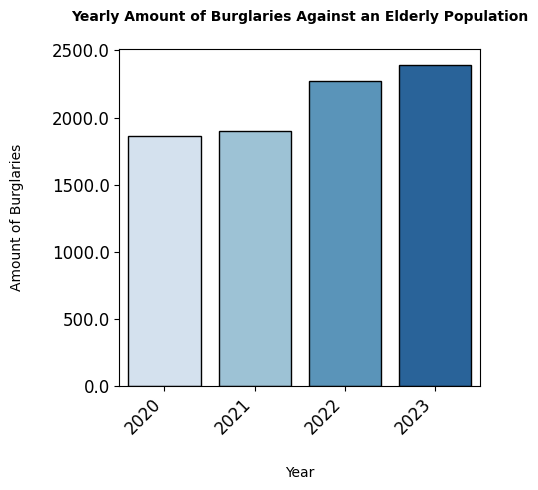

In [91]:
yearly_counts_old_burglary_df['year'] = yearly_counts_old_burglary_df['year'].astype(int)


fig, ax = plt.subplots(figsize=(5,5))


sns.barplot(x='year', y='amount_burglaries', data=yearly_counts_old_burglary_df, palette="Blues", edgecolor='black', ax=ax)


ax.set_xlabel('Year', fontsize=10, labelpad=20)
ax.set_ylabel('Amount of Burglaries', fontsize=10, labelpad=20)
ax.set_title('Yearly Amount of Burglaries Against an Elderly Population', fontsize=10, fontweight='bold', pad=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)


ax.yaxis.get_major_locator().set_params(integer=True)


plt.tight_layout()
plt.show()

על פי הגרף ניתן להבחין במגמת עלייה מדאיגה בנושא פריצות נגד האוכלוסייה המבוגרת

##### ננסה להבין כמה פושעים שביצעו פריצות לנכנסים של אנשים מהאוכלוסייה המבוגרת נענשים

In [93]:
status_description_counts = old_burglary_df['status_description'].value_counts().reset_index()
status_description_counts.columns = ['status_description', 'count']
status_description_counts

,status_description,count
0,Invest Cont,7716
1,Adult Arrest,521
2,Adult Other,185
3,Juv Arrest,4


C:\Users\Win10\AppData\Local\Temp\ipykernel_7256\4188607509.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_description', y='count', data=status_description_counts, palette=colors, edgecolor='black', ax=axes[0])
C:\Users\Win10\AppData\Local\Temp\ipykernel_7256\4188607509.py:19: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='status_description', y='count', data=status_description_counts, palette=colors, edgecolor='black', ax=axes[0])
C:\Users\Win10\AppData\Local\Temp\ipykernel_7256\4188607509.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


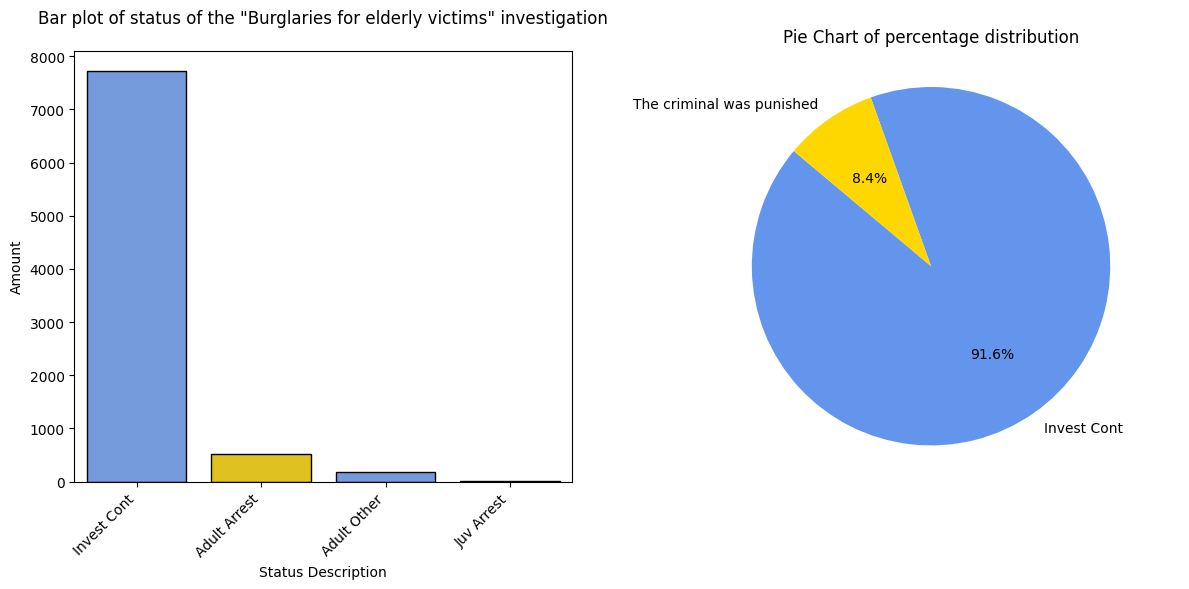

In [98]:
invest_cont_count = status_description_counts[status_description_counts['status_description'] == "Invest Cont"]['count'].sum()
other_count = status_description_counts['count'].sum() - invest_cont_count

status_description_simplified = pd.DataFrame({
    'status_description': ['Invest Cont', 'The criminal was punished'],
    'count': [invest_cont_count, other_count]
})


fig, axes = plt.subplots(1, 2, figsize=(12, 6))


colors = ["#6495ED", "#FFD700"]
axes[1].pie(status_description_simplified['count'], labels=status_description_simplified['status_description'], autopct='%1.1f%%', colors=colors, startangle=140)
axes[1].set_title('Pie Chart of percentage distribution')
axes[1].axis('equal')


sns.barplot(x='status_description', y='count', data=status_description_counts, palette=colors, edgecolor='black', ax=axes[0])


axes[0].set_xlabel('Status Description')
axes[0].set_ylabel('Amount')
axes[0].set_title('Bar plot of status of the "Burglaries for elderly victims" investigation',fontsize=12, pad=20)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()

ניתן לראות על פי הגרפים שב91.6 אחוז מהמקרים בהם האוכלוסייה הזקנה מדווחת על פריצה, החקירה נמצאת במצב פתוח, משמע רוב הפורצים לא נעצרים. מבחינה כמותית מתוך 8426 מקרים בהם פרצו לבתים ועסקים של אנשים מעל גיל 60 כ7716 מקרים עדיין מוגדרים כמקרים פתוחים

##### נבדוק האם יש מגמת עלייה או ירידה ביחס הפושעים שנענשו במהלך השנים

In [103]:
status_description_yearly_counts = old_burglary_df.groupby(['year_occurred', 'status_description']).size().reset_index(name='count')


pivot_table = status_description_yearly_counts.pivot(index='year_occurred', columns='status_description', values='count').fillna(0)


pivot_table

status_description,Adult Arrest,Adult Other,Invest Cont,Juv Arrest
year_occurred,,,,
2020,147.0,69.0,1646.0,1.0
2021,146.0,38.0,1715.0,0.0
2022,132.0,45.0,2092.0,2.0
2023,96.0,33.0,2263.0,1.0


In [104]:
required_columns = ['Adult Arrest', 'Adult Other', 'Juv Arrest']
for col in required_columns:
    if col not in pivot_table.columns:
        pivot_table[col] = 0


result_df = pivot_table.reset_index()
result_df['The criminal was punished'] = result_df[required_columns].sum(axis=1)
result_df = result_df[['year_occurred', 'Invest Cont', 'The criminal was punished']]


result_df = result_df.fillna(0)

result_df.columns = ['Year', 'Invest Cont', 'criminals_punished']
result_df

,Year,Invest Cont,criminals_punished
0,2020,1646.0,217.0
1,2021,1715.0,184.0
2,2022,2092.0,179.0
3,2023,2263.0,130.0


In [105]:
result_df = pivot_table.reset_index()
result_df['The criminal was punished'] = result_df[required_columns].sum(axis=1)
result_df = result_df[['year_occurred', 'Invest Cont', 'The criminal was punished']]


result_df = result_df.fillna(0)
result_df.columns = ['year', 'Invest Cont', 'criminals_punished']
result_df

,year,Invest Cont,criminals_punished
0,2020,1646.0,217.0
1,2021,1715.0,184.0
2,2022,2092.0,179.0
3,2023,2263.0,130.0


In [106]:
result_subset = result_df[['criminals_punished', 'year']]
yearly_counts_subset = yearly_counts_old_burglary_df[['amount_burglaries', 'year']]


final_df = pd.merge(result_subset, yearly_counts_subset, on='year')


final_df = final_df[['year', 'amount_burglaries', 'criminals_punished']]
final_df


,year,amount_burglaries,criminals_punished
0,2020,1863,217.0
1,2021,1899,184.0
2,2022,2271,179.0
3,2023,2393,130.0


##### נבדוק את הקורלציה בין עליית כמות הפריצות עם כמות ירידת הפורצים שנתפסו בשנים האחרונות

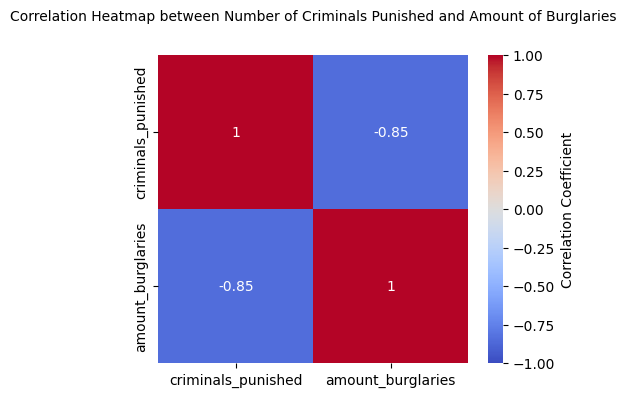

In [121]:
correlation_data = final_df[['criminals_punished', 'amount_burglaries']]
correlation_matrix = correlation_data.corr()


plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap between Number of Criminals Punished and Amount of Burglaries', fontsize=10 , pad=25)
plt.show()






בהתאם לנתוני הקורלציה, ניתן להסיק כי קיימת מגמה לפיה ככל שמספר העבריינים שנענשים הולך ודועך, כך מספר הפריצות הולך ועולה. קשר זה, שמוערך ב-0.85-, מצביע על קשר שלילי חזק בין שני המקרים

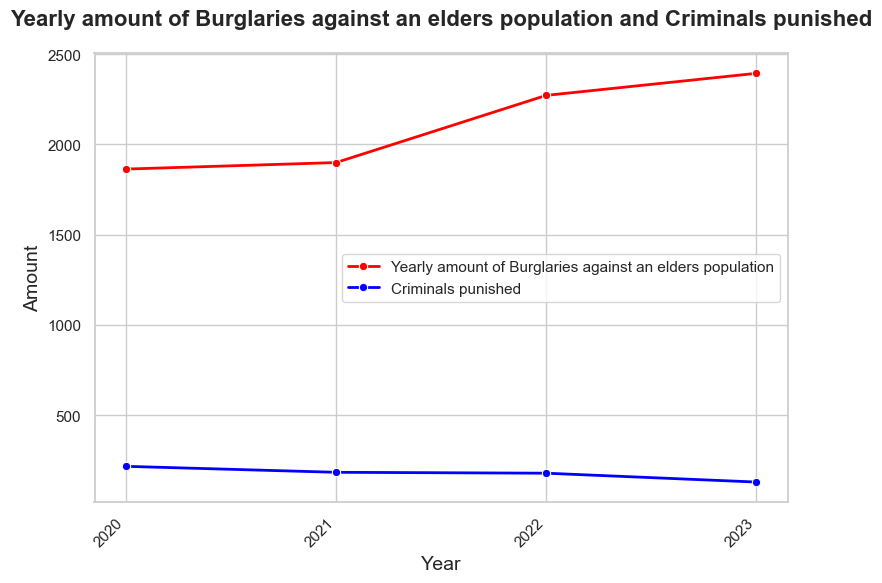

In [127]:
sns.set_theme(style="whitegrid")


final_df['year'] = final_df['year'].astype(int)
result_df['year'] = result_df['year'].astype(int)


plt.figure(figsize=(8, 6))


sns.lineplot(x='year', y='amount_burglaries', data=final_df, color='red', marker='o', linestyle='-', linewidth=2, markersize=6, label='Yearly amount of Burglaries against an elders population')
sns.lineplot(x='year', y='criminals_punished', data=result_df, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6, label='Criminals punished')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.title('Yearly amount of Burglaries against an elders population and Criminals punished', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### מסקנה 2 

על פי החקירה שחברי הצוות עשו בנושא "פריצות לנכסים של האוכלוסייה המבוגרת" לראות כי בשנים האחרונות חלה עלייה בכמות עבירות הפריצה שנעשות נגד אנשים בני 60 ומעלה,
ומנגד חלה ירידה בכמות הפושעים שנענשו על העבירה. הנתונים הללו שמרבית הפורצים לא נענשים מצבעים על מגמת ירידה של המשטרה בלוס אנג'לס בנושא הזה, מה שנותן לפורצים לגטימציה  להמשיך ולבצע פריצות לנכנסים של האוכלוסייה המבוגרת. המשטרה בלוס אנג'לס חייבת לשים יותר דגש על לכידת פורצים שפורצים לנכנסים של אוכלוסיית האנשים מגיל 60 ומעלה
מכייון שעל פי הקורלציה השלילית החזקה שיש בין המקרים, ככל שכמות  העונשים לפורצים שפרצו לנכנסים של אנשים מגיל 60 ומעלה תגדל, כך תגדל גם כמות הפריצות נגד אותה אוכלוסייה תקטן , ולכן חובת המשטרה היא לעצור את כמה שיותר פורצים כאלו על מנת לתת הרתעה לפורצים, ולתת תחושת ביטחון לאוכלוסייה המבוגרת

### שימוש בנשק חם ברחוב 77

In [64]:
firearm_df = df[df["weapon_category"] == "firearm"] 
sharp_weapon_df = df[df["weapon_category"] == "Physical strength"]

area_name_counts = firearm_df['area_name'].value_counts().reset_index()

area_name_counts.columns = ['area_name', 'count']





C:\Users\Win10\AppData\Local\Temp\ipykernel_3596\1831762724.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=area_name_counts, y='area_name', x='count', palette=palette, ax=ax)


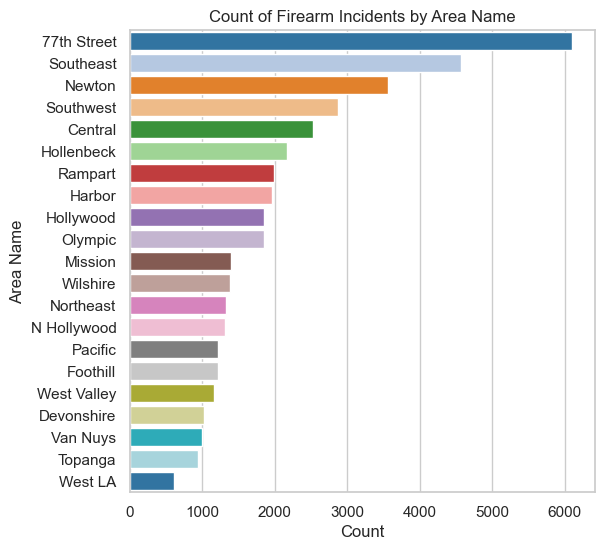

In [65]:
palette = sns.color_palette("tab20", len(area_name_counts))


sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(6,6))


bar_plot = sns.barplot(data=area_name_counts, y='area_name', x='count', palette=palette, ax=ax)


ax.set_title('Count of Firearm Incidents by Area Name')
ax.set_xlabel('Count')
ax.set_ylabel('Area Name')

plt.show()

ניתן לראות שהאיזור הכי בעייתי מבחינת פשעים שבצעו מבחינת נשק חם הוא רחוב 77 נתמקד בו

נבדוק מה המקומות בהם נעשים הכי הרבה פעשים בעזרת שימוש בנשק חם רחוב 77

In [66]:
th77_firearm_df = firearm_df[firearm_df["area_name"] =="77th Street"]
premise_description_counts = th77_firearm_df['premise_description'].value_counts().reset_index()
premise_description_counts.columns = ['premise_description', 'count']
premise_description_counts.head(10)

,premise_description,count
0,STREET,3041
1,SINGLE FAMILY DWELLING,744
2,SIDEWALK,587
3,PARKING LOT,342
4,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",294
5,ALLEY,138
6,OTHER BUSINESS,105
7,GAS STATION,96
8,DRIVEWAY,85
9,"VEHICLE, PASSENGER/TRUCK",57


C:\Users\Win10\AppData\Local\Temp\ipykernel_3596\2839783655.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='premise_description', y='count', data=premise_description_counts.head(10), ax=ax, palette=palette)


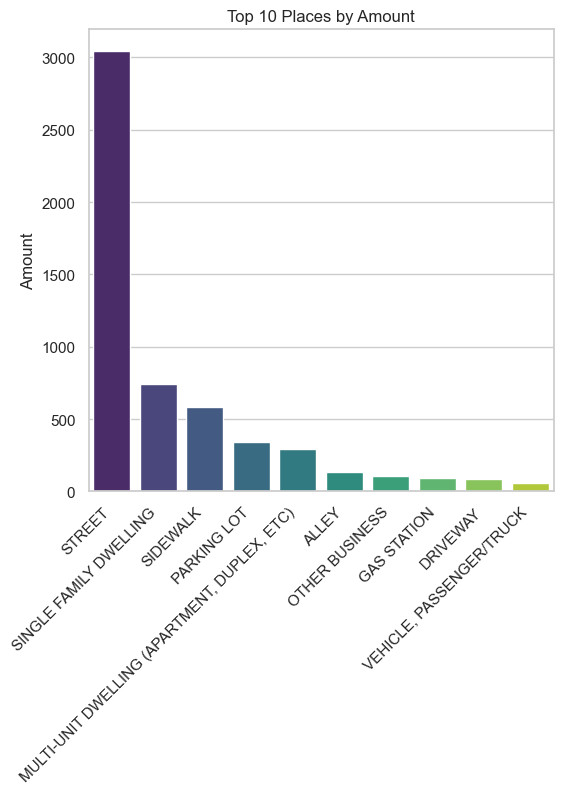

In [67]:
fig, ax = plt.subplots(figsize=(6,6))


palette = sns.color_palette("viridis", n_colors=10)
sns.barplot(x='premise_description', y='count', data=premise_description_counts.head(10), ax=ax, palette=palette)


ax.set_title('Top 10 Places by Amount')
ax.set_xlabel('')
ax.set_ylabel('Amount')


plt.xticks(rotation=45,ha = "right")


plt.show()

נניתן לראות שבפער ניקר מהמקום השני הכי הרבה פשעים ששומשו בעזרת נשק חם קרו ברחוב 

ניצור עמודה חדשה שתתן שתיתן לנו מידע האם הפשע בוצע במקום ציבורי או פרטי

In [68]:
public_places = [
    'TRAIN TRACKS',
    'TOW YARD',
    'OTHER/OUTSIDE',
    'TUNNEL',
    'VACANT LOT',
    'SWAP MEET',
    'FREEWAY',
    'SHOPPING MALL (COMMON AREA)',
    'PARK/PLAYGROUND',
    'MARKET',
    'BUS STOP',
    'GAS STATION',
    'ALLEY',
    'PARKING LOT',
    'SIDEWALK',
    'STREET',
    "TRANSIENT ENCAMPMENT",
]


th77_firearm_df['public_or_private'] = th77_firearm_df['premise_description'].apply(lambda x: 'public place' if x in public_places else 'private place')


C:\Users\Win10\AppData\Local\Temp\ipykernel_3596\1325836332.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  th77_firearm_df['public_or_private'] = th77_firearm_df['premise_description'].apply(lambda x: 'public place' if x in public_places else 'private place')


In [69]:
public_private_counts = th77_firearm_df['public_or_private'].value_counts().reset_index()
public_private_counts.columns = ["public_or_private", "count"]
public_private_counts

,public_or_private,count
0,public place,4306
1,private place,1800


C:\Users\Win10\AppData\Local\Temp\ipykernel_3596\98618150.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='public_or_private', y='count', data=public_private_counts, ax=axes[0], palette=colors)


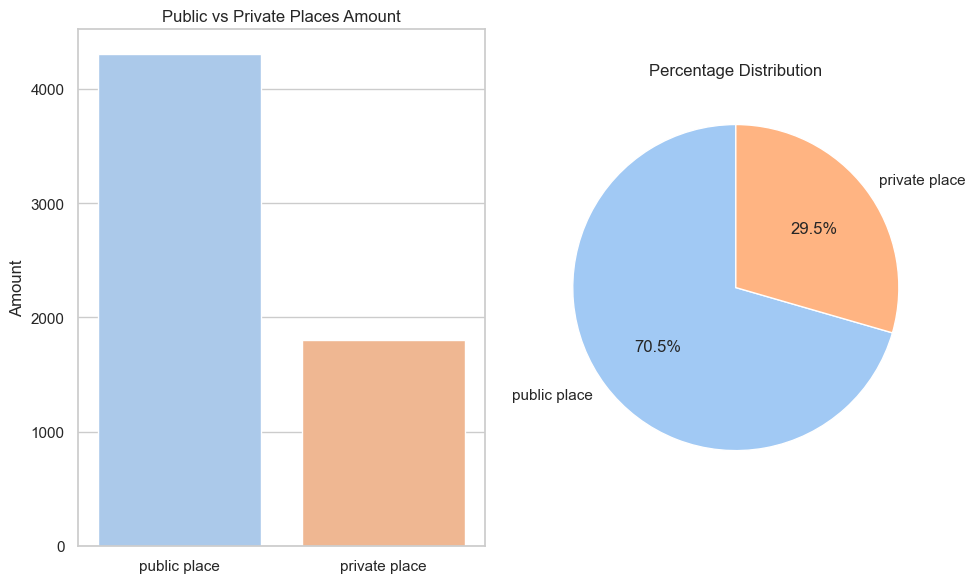

In [70]:
colors = sns.color_palette("pastel")[0:2]


fig, axes = plt.subplots(1, 2, figsize=(10,6))


sns.barplot(x='public_or_private', y='count', data=public_private_counts, ax=axes[0], palette=colors)
axes[0].set_title('Public vs Private Places Amount')
axes[0].set_xlabel('')
axes[0].set_ylabel('Amount')


axes[1].pie(public_private_counts['count'], labels=public_private_counts['public_or_private'], autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Percentage Distribution')


plt.tight_layout()
plt.show()

כמו שחשבנו בפער ניכר השימוש בנשק לצרוך ביצוע עיברות, גדול בהרבה כאשר הפשע מתבצע במקומות ציבוריים

נבדוק מה קרה עם פשעים שבוצעו בעזרת נשק חם לאורך השנים

ניתן להבין על פי הגרף שהמשטרה ברחוב 77 עושה עבודה מעולה ואכן מצליחה להוריד את כמות הפשעים משנה לשנה

In [71]:
area_year_counts = th77_firearm_df.groupby(['public_or_private', 'year_occurred']).size().reset_index(name='count')




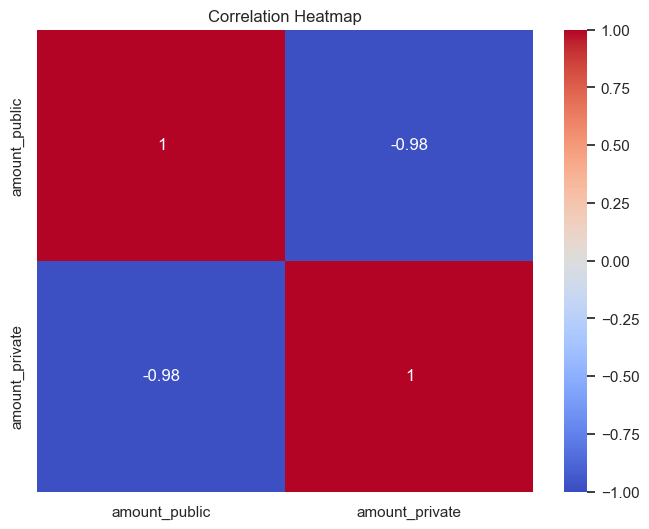

In [72]:
public_counts = area_year_counts[area_year_counts['public_or_private'] == 'public place'][['year_occurred', 'count']].rename(columns={'count': 'amount_public'})
private_counts = area_year_counts[area_year_counts['public_or_private'] == 'private place'][['year_occurred', 'count']].rename(columns={'count': 'amount_private'})


merged_counts = pd.merge(public_counts, private_counts, on='year_occurred', how='outer')


merged_counts.fillna(0, inplace=True)


correlation_matrix = merged_counts[['amount_public', 'amount_private']].corr()


plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)


plt.title('Correlation Heatmap')


plt.show()


הקורלציה החזקה והשלילית מסבירה את הקשר החזק שבין הפשעים שבוצעו בעזרת שימוש בנשק חם בשכונת 77 במקומות ציבוריים לבין אלה שבוצעו במקומות פרטיים

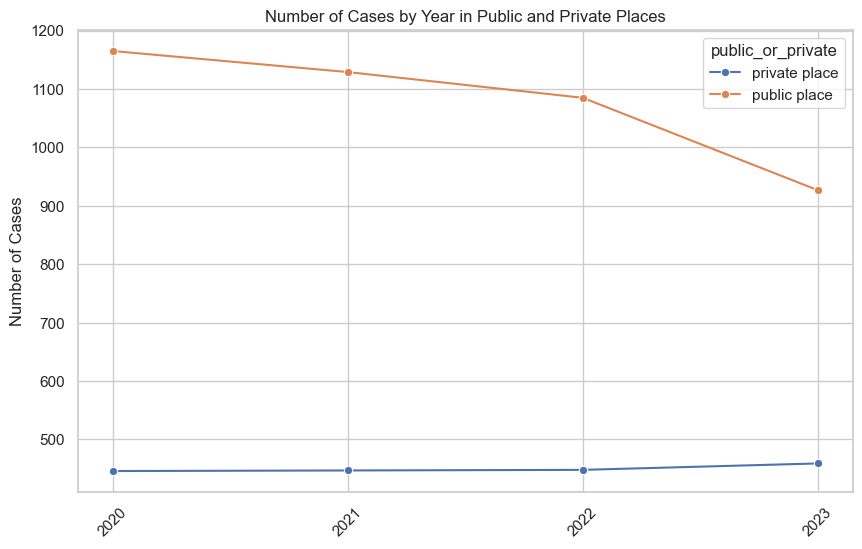

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))


sns.lineplot(data=area_year_counts, x='year_occurred', y='count', hue='public_or_private', marker='o', ax=ax)


ax.set_title('Number of Cases by Year in Public and Private Places')
ax.set_xlabel('')
ax.set_ylabel('Number of Cases')


ax.set_xticks(area_year_counts['year_occurred'].unique())
ax.set_xticklabels(area_year_counts['year_occurred'].unique(), rotation=45)


plt.show()

#### מסקנה 3

ניתן להסיק כי בשנים באחרות ישנה ירידה בכמות הפשעים נעשים תוך כדי שימוש בנשק חם בפשעים שנעשים במקומות ציבוריים בשכונה 77, אך מנגד כמות הפשעים שמבוצעים באמצעות נשק חם במקומות הפרטיים בשכונה נשאר במצב יחסית סטטי, אפילו נחל עלייה מינורית אנו סבורים שהמשטרה משקיעה את מירב המאמצים בפשעים שמתבצעים במקומות ציבוריים וברחובות, ופחות מתמקדת במקומות הפרטיים, מה שמשאיר את הכמות במצב יחסית סטטי

### כיוסים בלוס אנג'לס

In [74]:
chipopo_df = df[df["crime_description"] == "PICKPOCKET"]



In [75]:
area_name_counts = chipopo_df['area_name'].value_counts().reset_index()
area_name_counts.columns = ['area_name', 'count']
area_name_counts

,area_name,count
0,Central,539
1,Hollywood,510
2,Southwest,264
3,Wilshire,185
4,Olympic,154
5,Newton,112
6,Northeast,112
7,Rampart,96
8,Pacific,89
9,West LA,83


C:\Users\Win10\AppData\Local\Temp\ipykernel_3596\1910272616.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='area_name', data=area_name_counts, palette=colors)


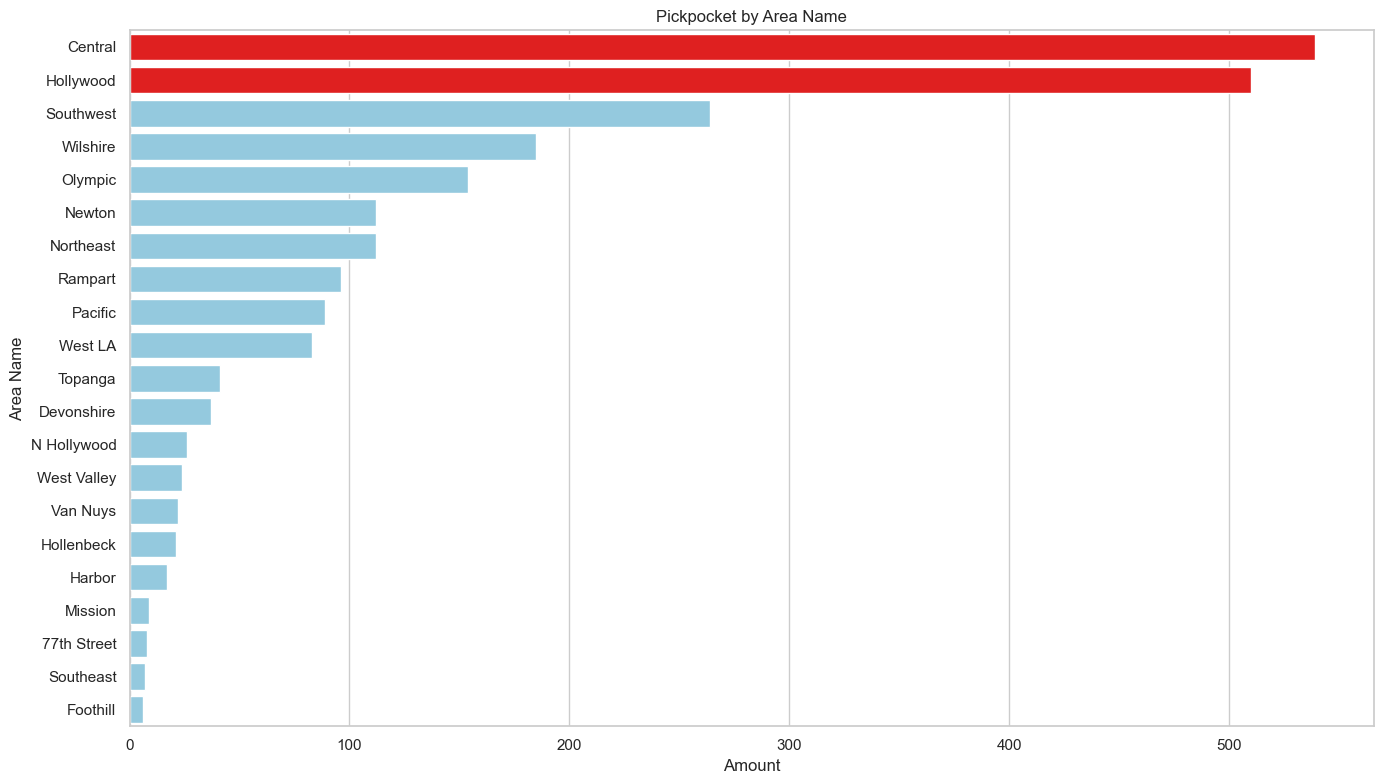

In [76]:
colors = ['red' if area in ['Central', 'Hollywood'] else 'skyblue' for area in area_name_counts['area_name']]

# Create a bar plot for all area names with highlighted areas
plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='area_name', data=area_name_counts, palette=colors)

plt.title('Pickpocket by Area Name')
plt.xlabel('Amount')
plt.ylabel('Area Name')
plt.tight_layout()

# Show the plot
plt.show()

ניתן לראות שסנטרל והוליווד שיודעים כאזורים היותר מתויירים של לוס אנג'לס מובילים את הרשימה נתמקד בהם

In [77]:
CentralANDHollywood_df = chipopo_df[chipopo_df['area_name'].isin(['Central', 'Hollywood'])]
hour_counts_ch = CentralANDHollywood_df['hour_occurred'].value_counts().reset_index()
hour_counts_ch.columns = ['hour_occurred', 'count']

C:\Users\Win10\AppData\Local\Temp\ipykernel_3596\912432047.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_counts_ch['hour_occurred'].astype(str), y=hour_counts_ch['count'], palette=colors, ax=ax)


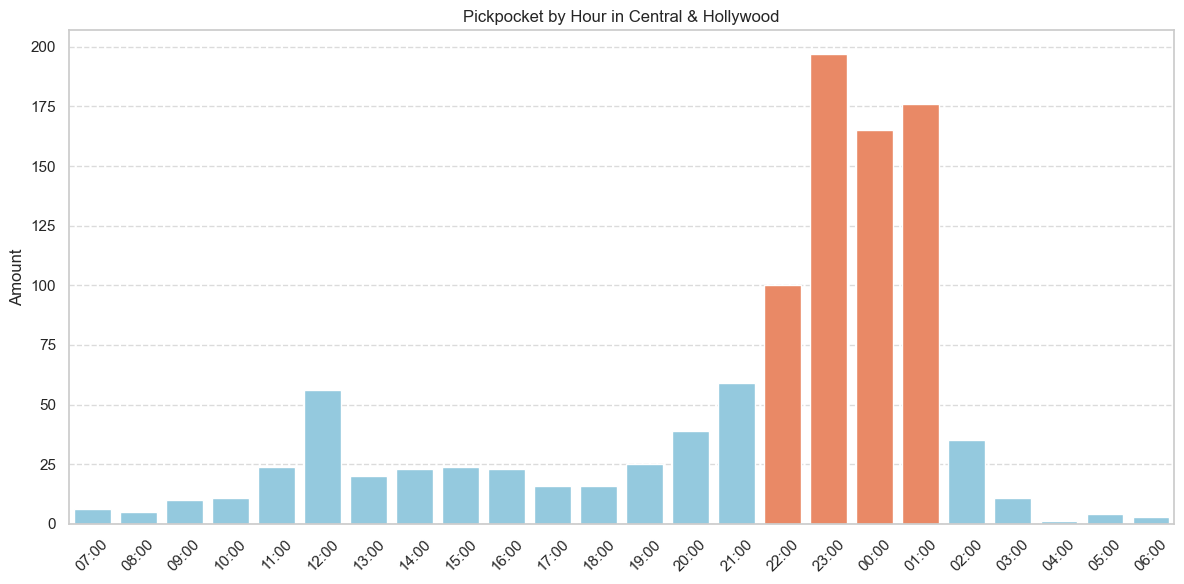

In [78]:
custom_order = list(range(7, 24)) + list(range(0, 7))


hour_counts_ch['hour_occurred'] = pd.Categorical(hour_counts_ch['hour_occurred'], categories=custom_order, ordered=True)
hour_counts_ch = hour_counts_ch.sort_values('hour_occurred').reset_index(drop=True)


colors = ['coral' if (hour >= 22 or hour <= 1) else 'skyblue' for hour in custom_order]


fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x=hour_counts_ch['hour_occurred'].astype(str), y=hour_counts_ch['count'], palette=colors, ax=ax)


hour_labels = [f'{hour:02d}:00' for hour in custom_order]


ax.set_xticks(range(len(custom_order)))
ax.set_xticklabels(hour_labels, rotation=45)

ax.set_xlabel('')
ax.set_ylabel('Amount')
ax.set_title('Pickpocket by Hour in Central & Hollywood')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()

ניתן לראות בשעות הערב בעיקר האלה השעות בהם הכייסים פועלים בהוליווד וסנטרל

In [79]:
day_of_week_counts = CentralANDHollywood_df['day_of_week'].value_counts().reset_index()
day_of_week_counts.columns = ['day_of_week', 'count']
day_of_week_counts

,day_of_week,count
0,Saturday,406
1,Sunday,241
2,Friday,221
3,Thursday,72
4,Monday,42
5,Tuesday,38
6,Wednesday,29


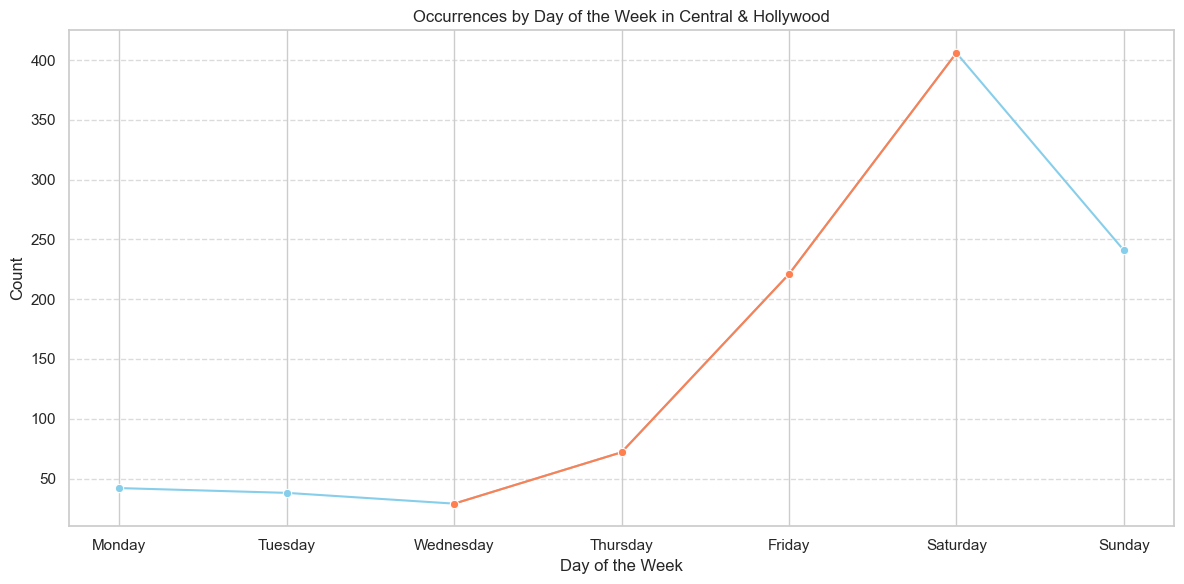

In [80]:
if 'day_of_week' not in CentralANDHollywood_df.columns:
    CentralANDHollywood_df['day_of_week'] = CentralANDHollywood_df['date_occurred'].dt.day_name()

custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_of_week_counts['day_of_week'] = pd.Categorical(day_of_week_counts['day_of_week'], categories=custom_order, ordered=True)
day_of_week_counts = day_of_week_counts.sort_values('day_of_week').reset_index(drop=True)


highlight_days = ['Wednesday', 'Thursday', 'Friday', 'Saturday']
colors = ['coral' if day in highlight_days else 'skyblue' for day in day_of_week_counts['day_of_week']]


plt.figure(figsize=(12, 6))


sns.lineplot(x='day_of_week', y='count', data=day_of_week_counts, marker='o', color='skyblue')


sns.lineplot(x='day_of_week', y='count', data=day_of_week_counts[day_of_week_counts['day_of_week'].isin(highlight_days)], marker='o', color='coral')

plt.title('Occurrences by Day of the Week in Central & Hollywood')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()

ניתן לראות שהעלייה מתחילה לקראת הסופש וכאשר הסופש נגמר מתחילה ירידה בעמות הכיוסים

In [143]:
premise_description_counts = CentralANDHollywood_df['premise_description'].value_counts().reset_index()
premise_description_counts.columns = ['premise_description', 'count']
premise_description_counts.head(10)

,premise_description,count
0,NIGHT CLUB (OPEN EVENINGS ONLY),319
1,BAR/COCKTAIL/NIGHTCLUB,216
2,BAR/SPORTS BAR (OPEN DAY & NIGHT),83
3,STREET,67
4,PARK/PLAYGROUND,65
5,SIDEWALK,61
6,OTHER/OUTSIDE,30
7,OTHER BUSINESS,26
8,CONVENTION CENTER,21
9,OTHER PREMISE,16


C:\Users\Win10\AppData\Local\Temp\ipykernel_3596\2336141824.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='premise_description', y='count', data=top_5_premise_description_counts, palette='viridis')


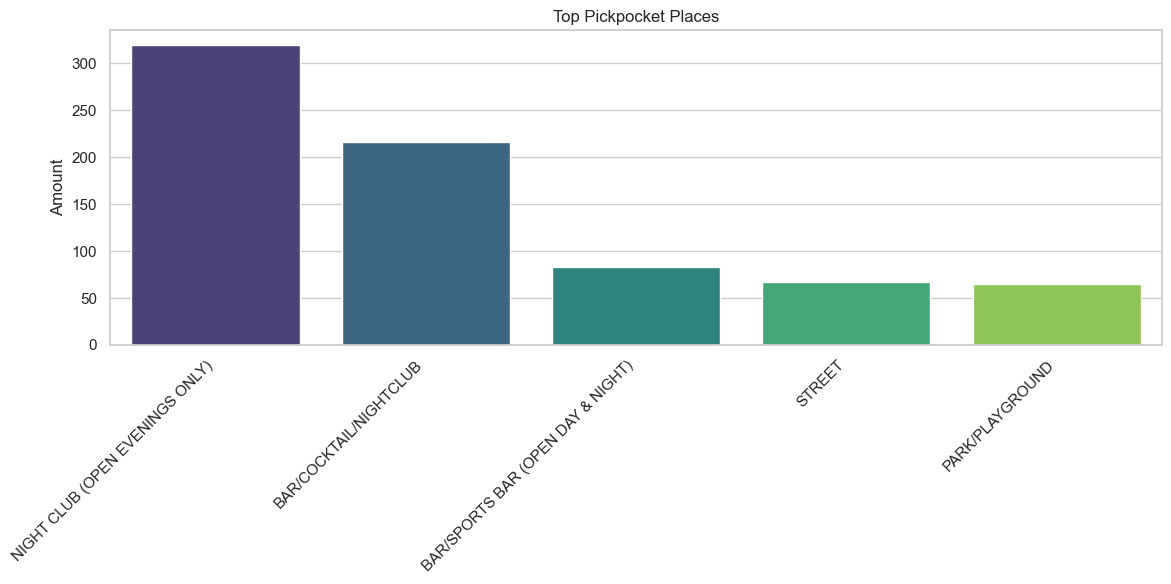

In [82]:
top_5_premise_description_counts = premise_description_counts.head(5)


plt.figure(figsize=(12, 6))
sns.barplot(x='premise_description', y='count', data=top_5_premise_description_counts, palette='viridis')

plt.title('Top Pickpocket Places')
plt.xlabel('')
plt.ylabel('Amount')
plt.xticks(rotation=45,ha = "right")
plt.tight_layout()


plt.show()

כפי חשבנו המקומות המובילים בהם קוראים כיוסים אלה מקומות בילוי

ניצור עמודה חדשה שתעזור לנו לבין כמה מקרים קרו במוקומת בילוי 

In [83]:
hang_out_places = [
    'STAPLES CENTER *', 'BAR/COCKTAIL/NIGHTCLUB',
    'SHOPPING MALL (COMMON AREA)', 'DISCOUNT STORE (99 CENT,DOLLAR,ETC.',
    'BEACH', 'BAR/SPORTS BAR (OPEN DAY & NIGHT)', 'RESTAURANT/FAST FOOD',
    'COLISEUM', 'MINI-MART', 'NIGHT CLUB (OPEN EVENINGS ONLY)', 'THE GROVE',
    'CLOTHING STORE', 'CONVENTION CENTER', 'DEPARTMENT STORE',
    "COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, ETC.)", 'LIQUOR STORE',
    'SPORTS VENUE, OTHER', 'THEATRE/MOVIE', 'SPORTS ARENA',
    'ENTERTAINMENT/COMEDY CLUB (OTHER)', 'MEMBERSHIP STORE (COSTCO,SAMS CLUB)*',
    "DIY CENTER (LOWE'S,HOME DEPOT,OSH,CONTRACTORS WAREHOUSE)", 'THE BEVERLY CONNECTION',
    'DODGER STADIUM', 'HOTEL', '*', 'MUSEUM', 'AMUSEMENT PARK*',
    'YARD (RESIDENTIAL/BUSINESS)', 'MASS GATHERING LOCATION',
    "SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S CLUB", 'OPTICAL OFFICE INSIDE STORE OR SUPERMARKET*'
]


CentralANDHollywood_df['hang-out place'] = CentralANDHollywood_df['premise_description'].isin(hang_out_places)

C:\Users\Win10\AppData\Local\Temp\ipykernel_3596\2063039858.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CentralANDHollywood_df['hang-out place'] = CentralANDHollywood_df['premise_description'].isin(hang_out_places)


C:\Users\Win10\AppData\Local\Temp\ipykernel_3596\2623677702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CentralANDHollywood_df['hangout_category'] = CentralANDHollywood_df['hang-out place'].apply(lambda x: 'hangout place' if x else 'other')
C:\Users\Win10\AppData\Local\Temp\ipykernel_3596\2623677702.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')


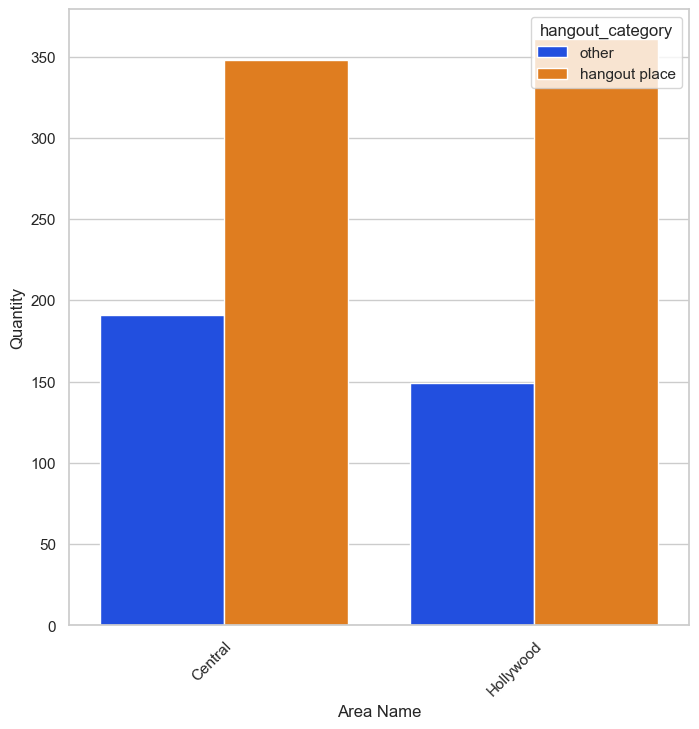

In [84]:
CentralANDHollywood_df['hangout_category'] = CentralANDHollywood_df['hang-out place'].apply(lambda x: 'hangout place' if x else 'other')


fig, ax = plt.subplots(figsize=(8,8))


sns.countplot(data=CentralANDHollywood_df, x='area_name', hue='hangout_category', ax=ax, palette='bright')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
ax.set_title('')
ax.set_xlabel('Area Name')
ax.set_ylabel('Quantity')

plt.show()












ניתן לראות שגם בסנטרל וגם בהולוויד רוב המקרים קורים בעיקר במקומות בילוי

נבדוק מה קרה במהלך השנים בנוגע לכייסים בהולוויד וסנטרל

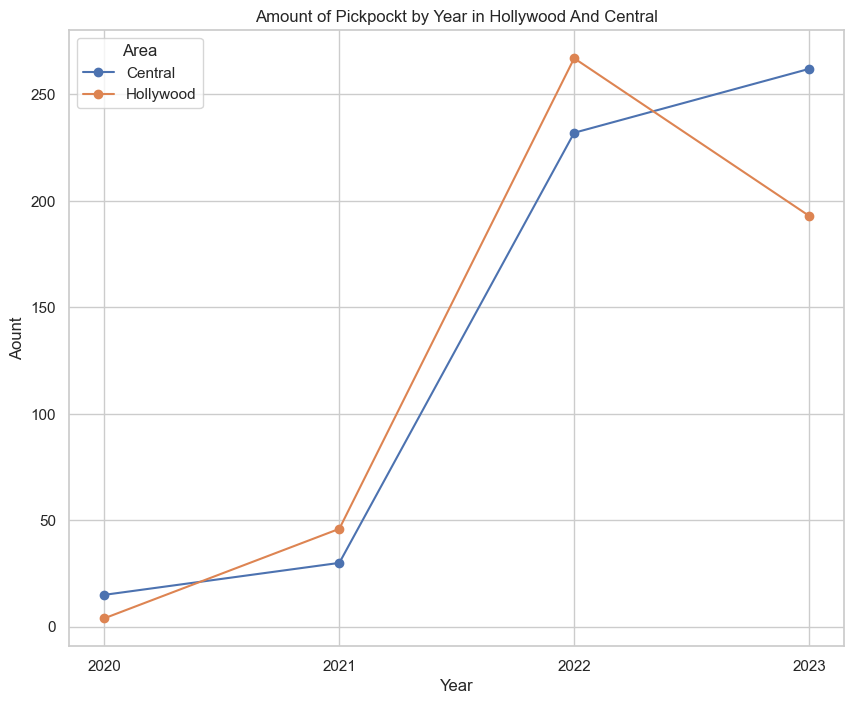

In [85]:
grouped_df= CentralANDHollywood_df.groupby(['area_name', 'year_occurred']).size().reset_index(name='count')

plt.figure(figsize=(10,8))


for area in grouped_df['area_name'].unique():
    area_data = grouped_df[grouped_df['area_name'] == area]
    plt.plot(area_data['year_occurred'], area_data['count'], marker='o', label=area)


plt.xlabel('Year')
plt.ylabel('Aount')
plt.title('Amount of Pickpockt by Year in Hollywood And Central')
plt.xticks(grouped_df['year_occurred'].unique())  
plt.legend(title='Area')


plt.grid(True)
plt.show()

ניתן לראות עלייה בכמות הכיוסים בשתי המקומות בין השנים 2020 ל2022 , אם זאת נראה שבהולוויד ישנה ירידה משנת 2022 ל2023, לעומת סנטרל ששם יש עלייה גם בין שנים האלה

In [86]:
status_description_counts = CentralANDHollywood_df["status_description"].value_counts().reset_index()
status_description_counts.columns = ['status_description', 'count']


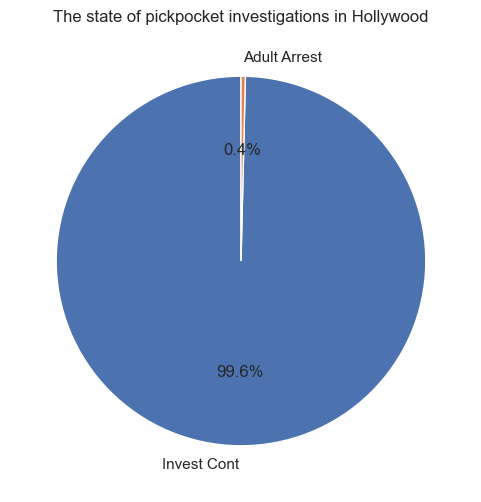

,status_description,count,percentage
0,Invest Cont,1045,99.618684
1,Adult Arrest,4,0.381316


In [87]:
status_description_counts['percentage'] = (status_description_counts['count'] / status_description_counts['count'].sum()) * 100

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(status_description_counts['percentage'], labels=status_description_counts['status_description'], autopct='%1.1f%%', startangle=90)
ax.set_title('The state of pickpocket investigations in Hollywood')

plt.show()
status_description_counts

#### מסקנה 4


אף על פי שהמגמה ברורה ומירב הכיסיום שקוראים בהולוויד ובסנטרל מתרחשים ברובם בסופי שבוע ובמקומות מרכזיים בעיקר בין השעון 22:00 ל1:00 בלילה,בסנטרל מקרי הכיוס עולים משנה לשנה בניגוד להווליד שהצליחה לבלום את העלייה ולהוריד את הכמות לאחר שנת 2022. אם זאת נראה שבשתי תחנות המשטרה של איזורים אלה לא מייחסים יותר מידי חשיבות למקרי כיוס ומתוך 1049 מקרי כיוס שקרו בשתי האיזורים, רק 4 פושעים נתפסו נתון שמהווה פחות מחצי אחוז מכמות המקרים 